In [1]:
%pip list

Package                        Version       Editable project location
------------------------------ ------------- ----------------------------------------------------------------------------------
algos                          0.0           /Users/nicktsao/Documents/Camera Culture/sensor package/cc-hardware/pkgs/algos
appnope                        0.1.4
asttokens                      2.4.1
async-timeout                  4.0.3
black                          24.8.0
bleak                          0.16.0
build                          1.2.2.post1
CacheControl                   0.14.0
cc_hardware                    0.0           /Users/nicktsao/Documents/Camera Culture/sensor package/cc-hardware
certifi                        2024.8.30
cffi                           1.17.1
cfgv                           3.4.0
charset-normalizer             3.4.0
cleo                           2.1.0
click                          8.1.7
cnc_robot                      0.0           /Users/nicktsao/Document

In [1]:
import serial
import numpy
import matplotlib.pyplot as plt
# pip install pySerial

In [2]:

PORT = "/dev/cu.usbmodem1103"
BAUDRATE = 921600
ser = serial.Serial(
    port=PORT,\
    baudrate=921600,\
    parity=serial.PARITY_NONE,\
    stopbits=serial.STOPBITS_ONE,\
    bytesize=serial.EIGHTBITS,\
        timeout=0)

print("connected to: " + ser.portstr)

connected to: /dev/cu.usbmodem1103


In [3]:

#this will store the line
# line = []

class ReadLine:
    def __init__(self, s):
        self.buf = bytearray()
        self.s = s

    def readline(self):
        i = self.buf.find(b"\n")
        if i >= 0:
            r = self.buf[:i+1]
            self.buf = self.buf[i+1:]
            return r
        while True:
            i = max(1, min(2048, self.s.in_waiting))
            data = self.s.read(i)
            i = data.find(b"\n")
            if i >= 0:
                r = self.buf + data[:i+1]
                self.buf[0:] = data[i+1:]
                return r
            else:
                self.buf.extend(data)


In [4]:
rl = ReadLine(ser)

In [5]:
class SpadMessage:
    def __init__(self, lines):
        # put some kind of timestamp here
        self.lines = lines.copy()
        # these should probably be vectorized at some point
        self.statuses = []
        self.distances = []
        self.ambients = []
        self.histograms = []
        self.parse_lines()

    def parse_lines(self):
        # parse base lines
        for i in range(16):
            line_idx = i + 1
            line = self.lines[line_idx]
            invalid_tokens = ["", ":"]
            tokens = [token for token in line.split(" ") if token not in invalid_tokens]
            status = int(tokens[3][:-1])
            distance = int(tokens[5])
            self.statuses.append(status)
            self.distances.append(distance)
        
        # parse histogram lines
        for i in range(16):
            line_idx = i + 17
            line = self.lines[line_idx]
            invalid_tokens = ["", ":"]
            tokens = [token for token in line.split(", ") if token not in invalid_tokens]
            ambient = float(tokens[3].strip())
            histogram_tokens = tokens[5:-1]
            histogram = [float(token.strip()) for token in histogram_tokens]
            self.ambients.append(ambient)
            self.histograms.append(histogram)


class SpadMessageBuilder:
    def __init__(self):
        self.lines = []
    
    def add_line(self, line):
        if len(self.lines) == 0:
            first_word = line.split(" ")[0]
            if first_word == "Print":
                self.lines.append(line)
        else:
            self.lines.append(line)
            print(len(self.lines))
            if len(self.lines) == 33:
                spad_message = SpadMessage(self.lines)
                self.lines = []
                return spad_message
    
    def clear(self):
        self.lines = []
            


In [6]:
# test_line = 'Zone :   4, Status :   4, Distance :    0 mm\n'
test_line = 'Agg,  0, Ambient,  1.9, Bins,  31775.0,  14483.2,  693.9,  106.4,  146.6,  154.8,  121.9,  106.4,  96.5,  77.4,  70.8,  72.9,  62.4,  60.5,  51.4,  51.5,  51.4,  45.9,  40.0,  37.2,  40.9,  35.5,  37.3,  37.6, \n'
test_invalid_tokens = ["", ":"]
test_tokens = [token for token in test_line.split(", ") if token not in test_invalid_tokens]

print(test_tokens)

['Agg', ' 0', 'Ambient', ' 1.9', 'Bins', ' 31775.0', ' 14483.2', ' 693.9', ' 106.4', ' 146.6', ' 154.8', ' 121.9', ' 106.4', ' 96.5', ' 77.4', ' 70.8', ' 72.9', ' 62.4', ' 60.5', ' 51.4', ' 51.5', ' 51.4', ' 45.9', ' 40.0', ' 37.2', ' 40.9', ' 35.5', ' 37.3', ' 37.6', '\n']


In [7]:
ser.isOpen()

True

In [111]:
bytearray([0, 1, 2, 3, 4])

bytearray(b'\x00\x01\x02\x03\x04')

In [241]:
ser.write(bytearray([0, 0, 0, 0, 0]))

5

In [472]:
ser.write(b'         ')

9

In [506]:
ser.write(b'         10')

11

In [8]:
while True:
    # print(rl.readline().decode("utf-8"))
    print(rl.readline())
    # print(ser.readline())
    # byte_buffer = bytearray([0, 1, 2, 3, 5])

    # ser.write(byte_buffer)
    # ser.write(b"hello\n")

bytearray(b'Started ranging\n')
bytearray(b'Print data no :   0\n')
bytearray(b'Agg,  0, Ambient, -0.5, Bins,  14.4,  368.2,  397.8,  60.6,  10.0,  2.3,  1.0, -0.4, -0.4, -0.4, -0.3, -0.2, -0.2, -0.1, -0.5, -0.4, -0.1, -0.3, -0.2, -0.2, -0.2, -0.0, -0.4, -0.1, \n')
bytearray(b'Agg,  1, Ambient, -0.2, Bins,  94.2,  583.0,  470.0,  43.8,  9.2,  3.0,  1.2, -0.6, -0.4, -0.9, -0.6, -0.3, -0.4, -0.2, -0.1, -0.2, -0.2, -0.1, -0.1, -0.2, -0.2, -0.2, -0.0, -0.2, \n')
bytearray(b'Agg,  2, Ambient, -0.6, Bins,  221.1,  751.0,  454.9,  34.9,  8.3,  2.5,  1.2, -0.9, -0.8, -0.4, -0.4, -0.1, -0.2, -0.5, -0.2, -0.2, -0.1, -0.5, -0.3, -0.2, -0.4,  0.1, -0.4, -0.0, \n')
bytearray(b'Agg,  3, Ambient, -0.4, Bins,  167.0,  526.5,  295.5,  23.5,  4.6,  1.9, -1.0, -0.6, -0.4, -0.6, -0.0, -0.3, -0.4, -0.4, -0.1, -0.2, -0.1, -0.3, -0.3, -0.2, -0.1, -0.1, -0.1, -0.0, \n')
bytearray(b'Agg,  4, Ambient, -0.6, Bins,  45.6,  478.8,  443.4,  46.8,  9.9,  2.9,  1.2, -0.6, -0.2, -0.4, -0.4,  0.1, -0.1, -0.0,  0.1, -0.

KeyboardInterrupt: 

In [86]:
ser.write(b"hello\n")
rl.readline()

KeyboardInterrupt: 

In [529]:

count_lines = 0
max_lines = 40
while True:
# while count_lines < max_lines:
    print("reading line")
    line_bytearr = rl.readline()
    line_str = line_bytearr.decode("utf-8")
    # print(line_bytearr)
    # print(type(line_bytearr))
    print(repr(line_str))
    count_lines += 1

reading line


KeyboardInterrupt: 

In [11]:
message_builder = SpadMessageBuilder()

In [12]:
count_lines = 0
max_lines = 100

latest_spad_message = None
# while True:
while count_lines < max_lines:
    print("reading line")
    line_bytearr = rl.readline()
    line_str = line_bytearr.decode("utf-8")
    # print(line_bytearr)
    # print(type(line_bytearr))
    # print(repr(line_str))
    spad_message = message_builder.add_line(line_str)
    if spad_message:
        latest_spad_message = spad_message
        print("got spad message")
        print(f"distances: {spad_message.distances}")
        print(f"histograms: {spad_message.histograms}")
    count_lines += 1

print("done reading lines")
message_builder.clear()


reading line
reading line
reading line
reading line
reading line
reading line
reading line
reading line
reading line
reading line
reading line
reading line
reading line
reading line
reading line
reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33


ValueError: invalid literal for int() with base 10: '-0.5'

In [13]:
latest_spad_message.distances

AttributeError: 'NoneType' object has no attribute 'distances'

In [14]:
for i in range(16):
    print(f"histogram {i}")
    print(len(latest_spad_message.histograms[i]))
    print(latest_spad_message.histograms[i])


histogram 0


AttributeError: 'NoneType' object has no attribute 'histograms'

In [17]:
hist_array = numpy.array(latest_spad_message.histograms)

In [18]:
hist_array

array([[ 0.3,  0.3,  0.2, -0.1,  0. ,  0. ,  0.1, -0. , -0. , -0.3, -0.4,
        -0.2,  2.7,  7.4,  4.8, -0.4, -0.1,  0.1,  0.1,  0. , -0. ,  0.1,
         0. , -0.1],
       [ 0.3,  0.3,  0.1, -0.1,  0. , -0.1, -0. , -0.1,  0. , -0.5, -0.5,
        -0.3,  2.3,  7.7,  4.3, -0.5, -0.1,  0. , -0. , -0.1, -0.1, -0. ,
         0. , -0. ],
       [ 0.2,  0.2,  0. , -0.1, -0. , -0. , -0. , -0.1, -0. , -0.3, -0.6,
        -0.2, -0.7,  3.7,  4. ,  1.2, -0.1, -0. , -0. , -0. , -0.1, -0.1,
        -0. , -0.1],
       [ 0.2,  0.2,  0.1, -0. , -0.1,  0. , -0. ,  0.1, -0. , -0.2, -0.4,
        -0.3, -0.1, -0.6,  2.2,  3. ,  1.2, -0.3, -0.1, -0.1,  0. ,  0. ,
         0. ,  0. ],
       [ 0.2,  0.2, -0. , -0. , -0. , -0. , -0. , -0. , -0.1, -0.5, -0.9,
        -0.4,  6.7,  9.4,  2. , -0.3, -0.1, -0.1, -0.1, -0. ,  0. , -0.1,
        -0. , -0. ],
       [ 0.1,  0.1,  0. , -0.1, -0.1, -0.1, -0.1, -0.1, -0. , -0.5, -0.8,
        -0.6,  6.1,  9.2,  2.2, -0.2, -0.1, -0.1, -0.1, -0. , -0.1, -0. ,
       

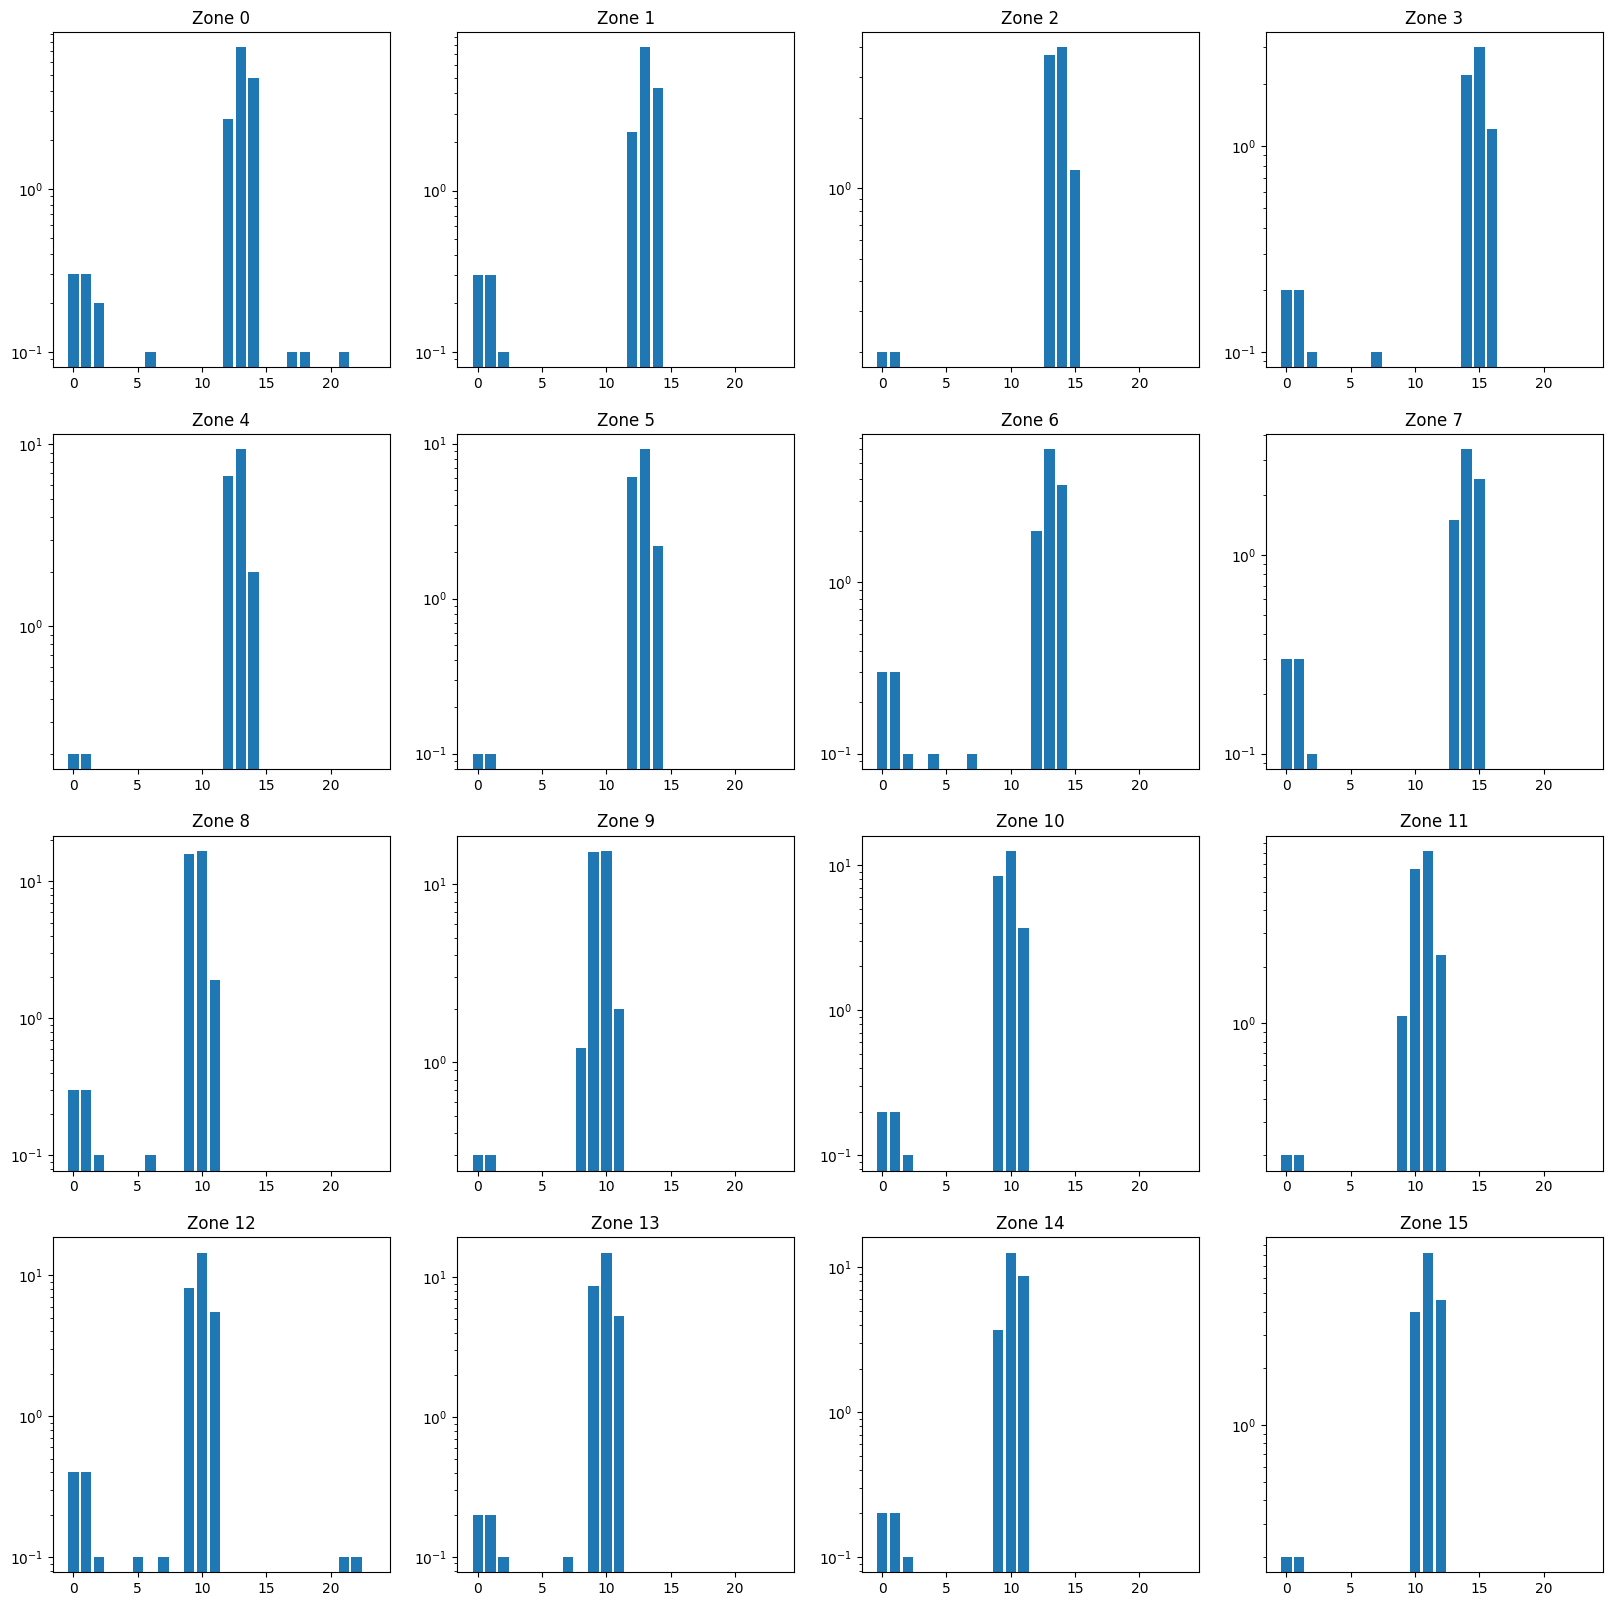

In [19]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

x = [i for i in range(24)]

# We can set the number of bins with the *bins* keyword argument.
for i in range(4):
    for j in range(4):
        axs[i, j].bar(x, latest_spad_message.histograms[i * 4 + j], log=True)
        axs[i, j].set_title(f"Zone {i * 4 + j}")

plt.show()

reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1838, 1892, 1959, 2021, 1835, 1897, 1961, 2024, 1386, 1429, 1475, 1521, 1388, 1430, 1477, 1528]
histograms: [[0.3, 0.3, 0.0, -0.1, 0.0, 0.0, 0.0, -0.0, 0.1, -0.1, -0.4, -0.2, 2.3, 6.9, 4.8, -0.4, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0], [0.3, 0.3, 0.1, -0.0, -0.0, -0.1, 0.0, -0.1, -0.1, -0.4, -0.5, -0.4, 3.0, 7.4, 4.6, -0.4, 0.0, 0.0, -0.0, -0.1, -0.1, -0.0, -0.1, -0.1], [0.3, 0.3, 0.0, 0.0, -0.1, 0.0, 0.0, -0.0, -0.1, -0.3, -0.4, -0.2, -0.7, 4.

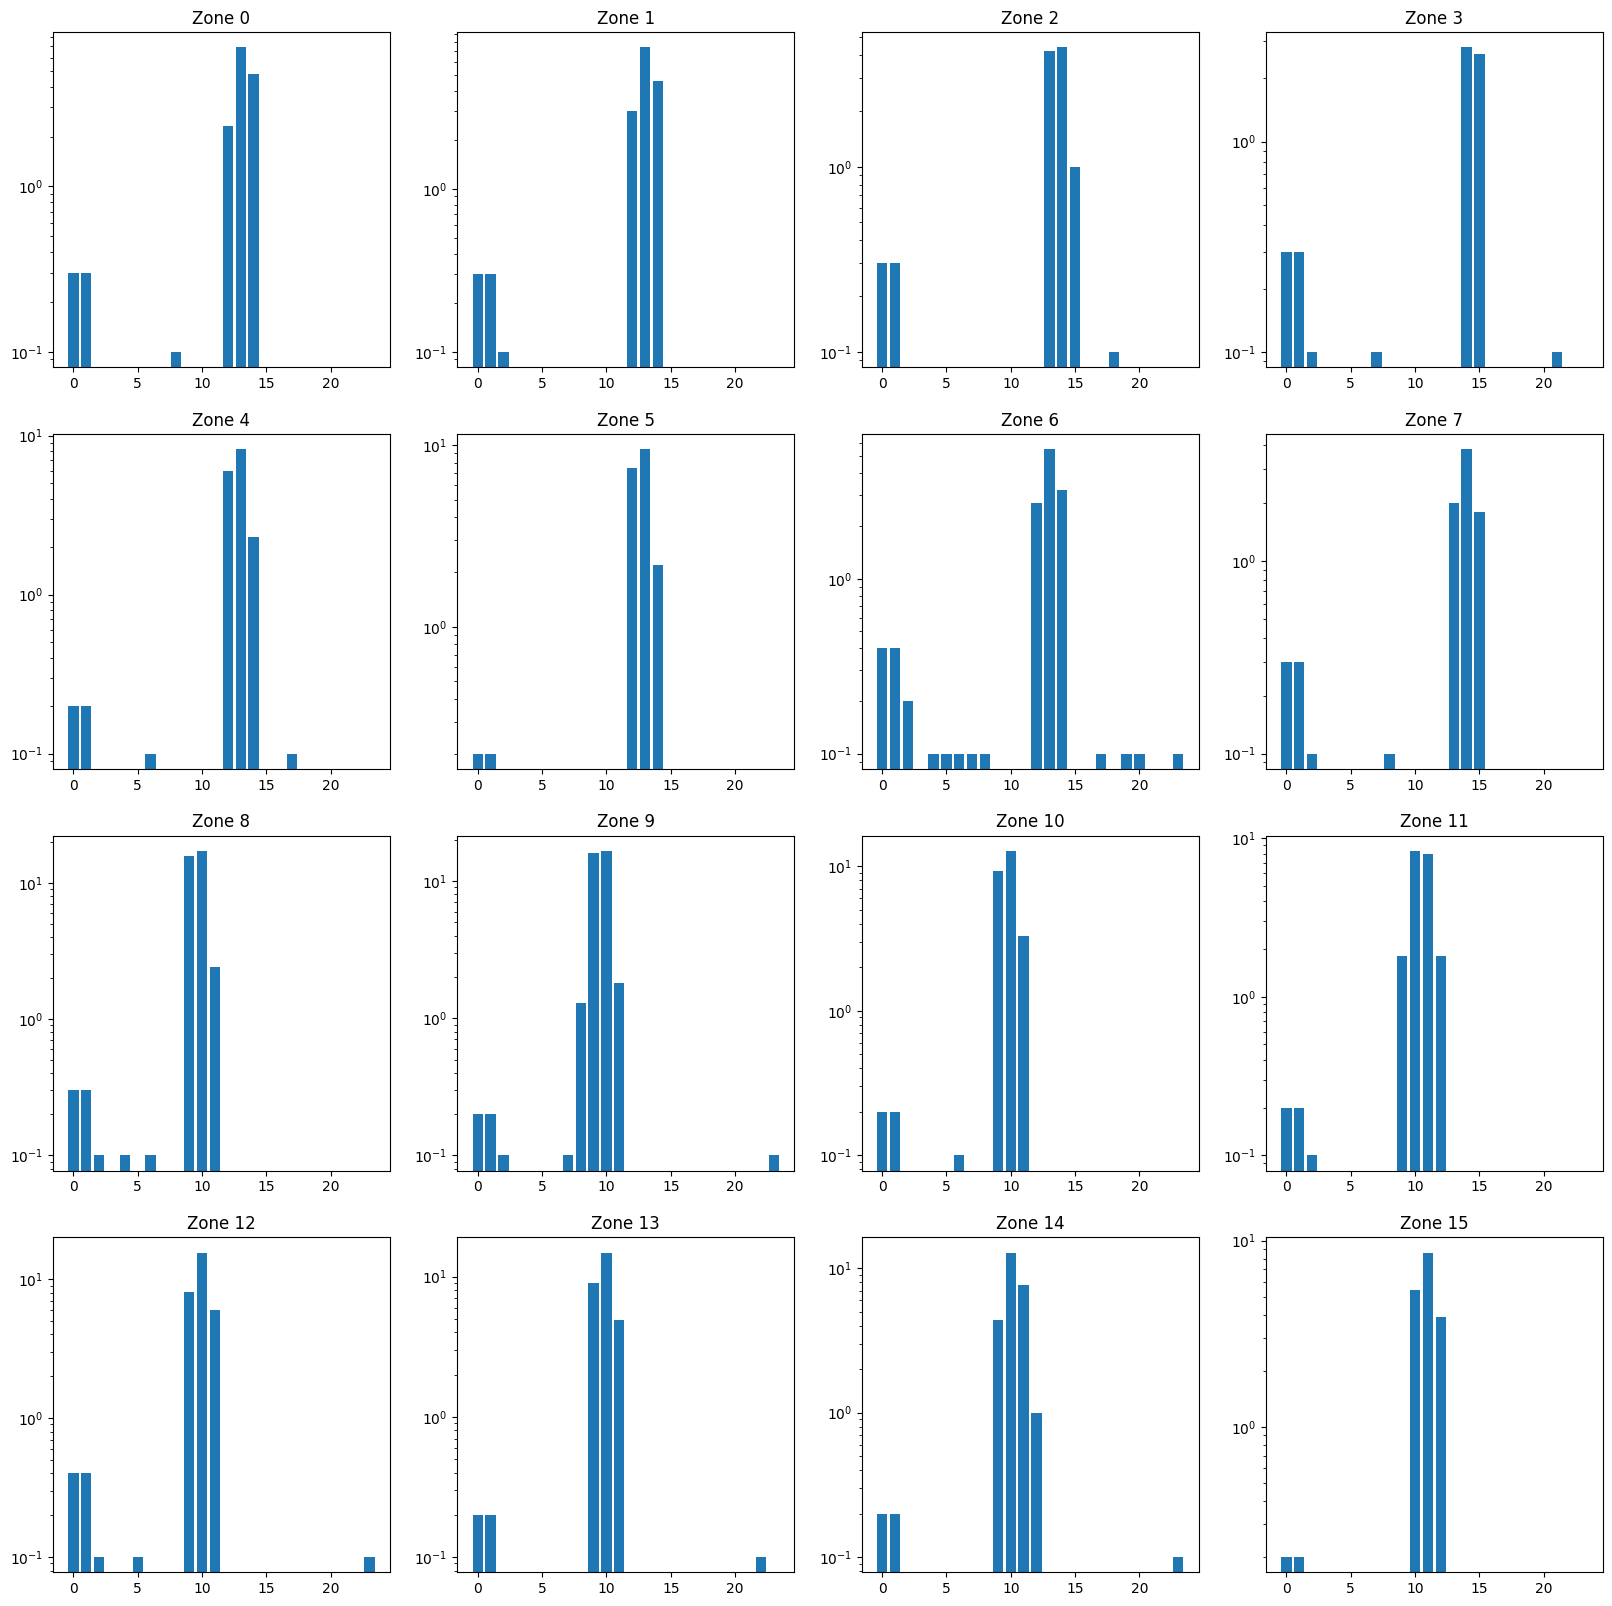

reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1835, 1888, 1958, 2030, 1839, 1900, 1958, 2025, 1386, 1430, 1476, 1532, 1384, 1431, 1472, 1530]
histograms: [[0.3, 0.3, 0.2, -0.1, 0.0, 0.1, 0.1, 0.0, 0.1, -0.2, -0.4, -0.3, 2.3, 6.9, 4.5, -0.4, -0.0, -0.0, -0.0, 0.1, -0.0, 0.0, 0.1, -0.0], [0.3, 0.3, 0.0, -0.0, -0.0, 0.0, -0.1, -0.0, -0.1, -0.3, -0.6, -0.2, 3.3, 7.5, 4.4, -0.5, -0.1, -0.0, -0.2, -0.1, 0.0, -0.0, -0.1, 0.0], [0.2, 0.2, 0.1, 0.1, -0.0, 0.0, -0.1, -0.0, -0.1, -0.3, -0.6, -0.1, -0.7, 4.

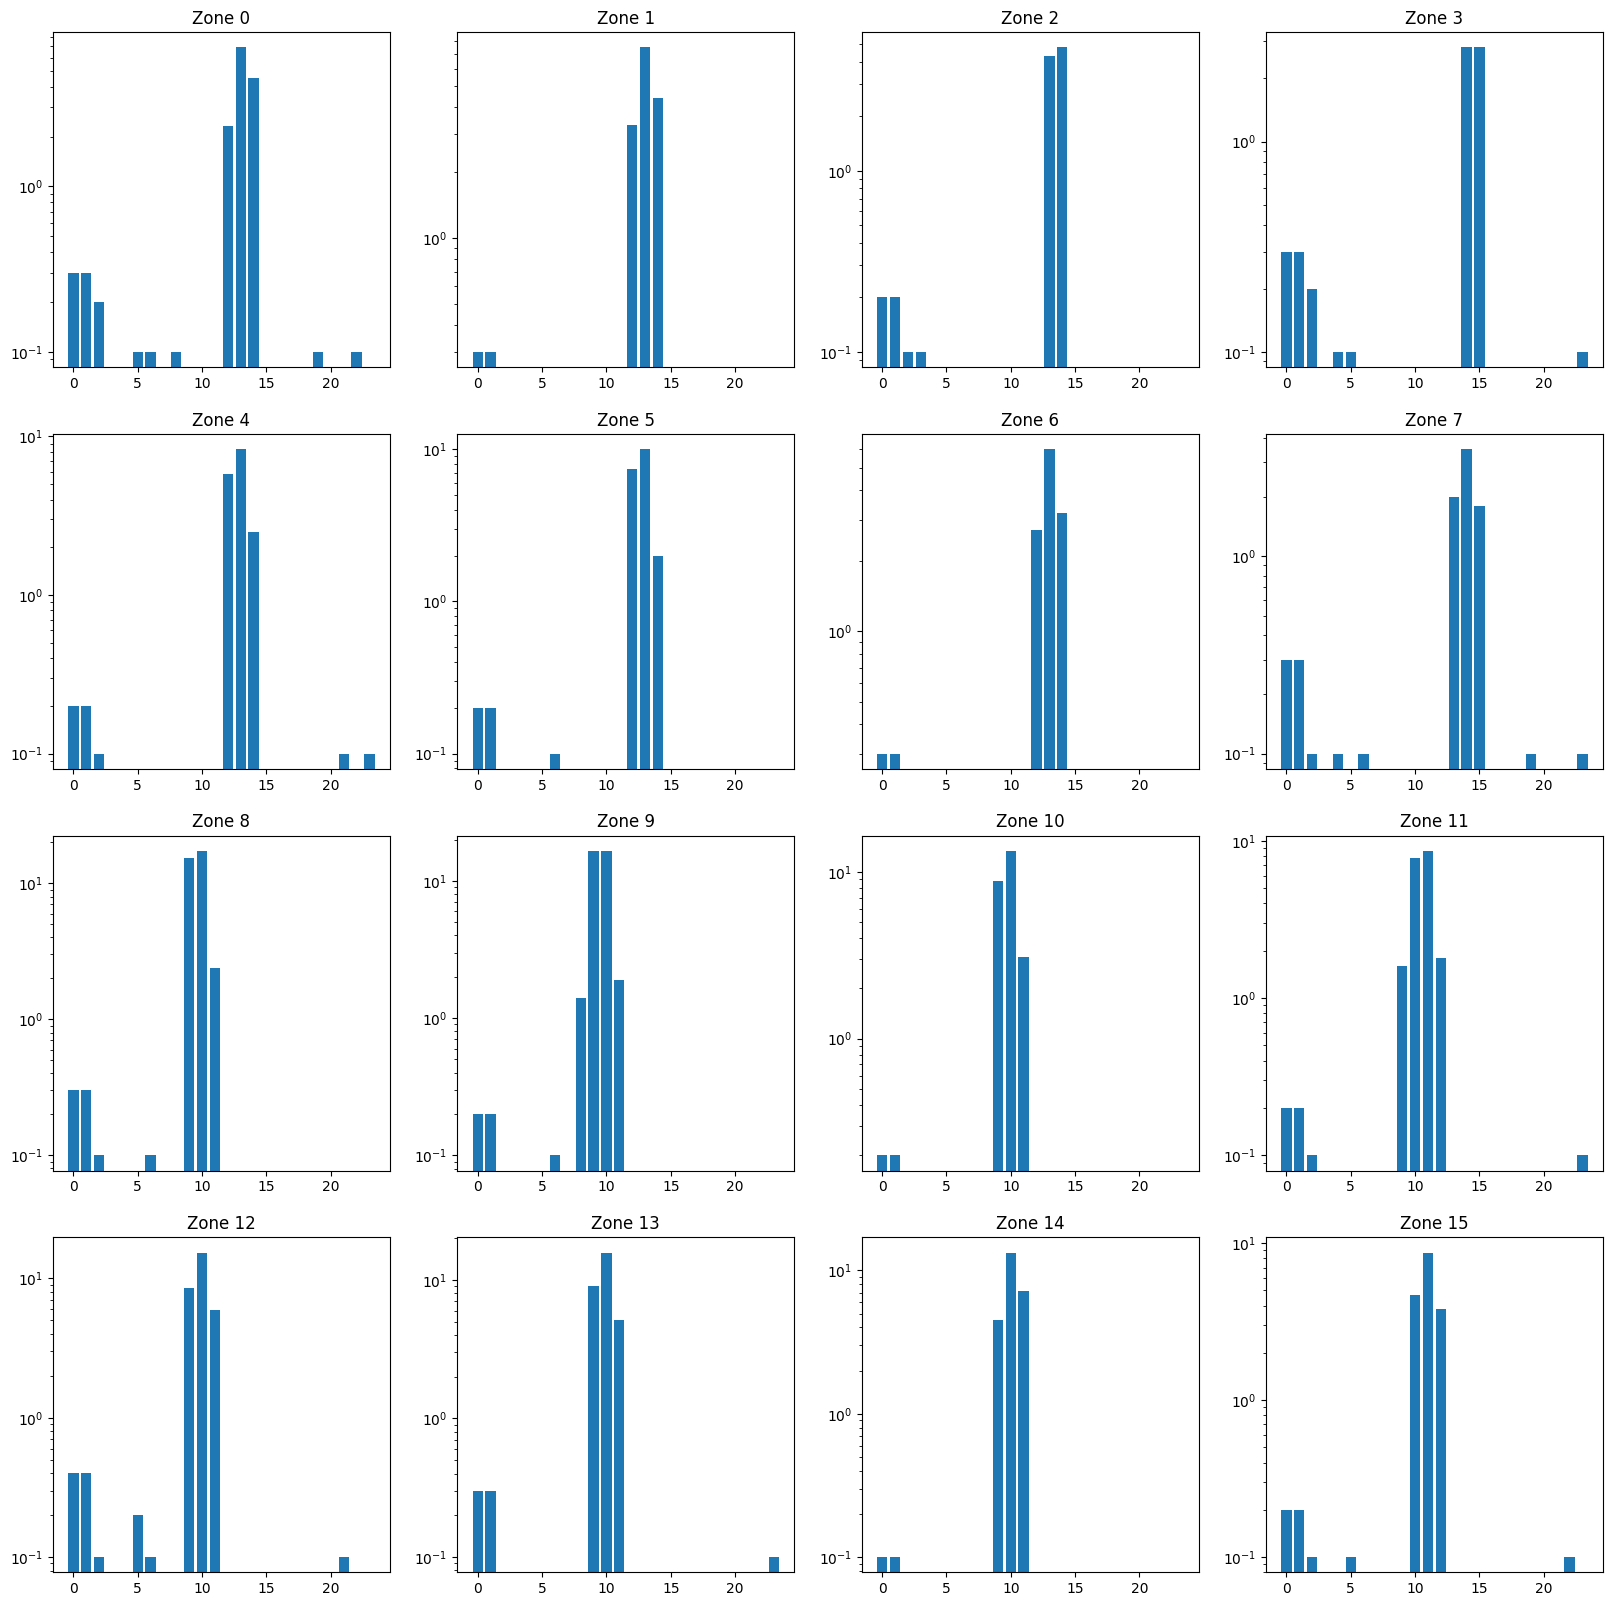

reading line
reading line
reading line
reading line
reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1839, 1890, 1953, 2037, 1842, 1896, 1964, 2017, 1389, 1427, 1476, 1533, 1389, 1431, 1478, 1532]
histograms: [[0.3, 0.3, 0.1, -0.0, 0.0, -0.1, 0.0, -0.0, 0.0, -0.3, -0.4, -0.2, 2.1, 7.1, 4.8, -0.5, 0.0, -0.0, -0.0, 0.0, -0.0, 0.1, -0.0, 0.1], [0.3, 0.3, 0.0, -0.1, 0.0, 0.0, -0.0, 0.0, -0.1, -0.3, -0.5, -0.4, 3.1, 7.8, 4.5, -0.4, 0.0, -0.1, -0.0, 0.0, -0.0, -0.0, -0.1, 0.0], [0.3, 0.3, 0.1, -0.0, -0.0

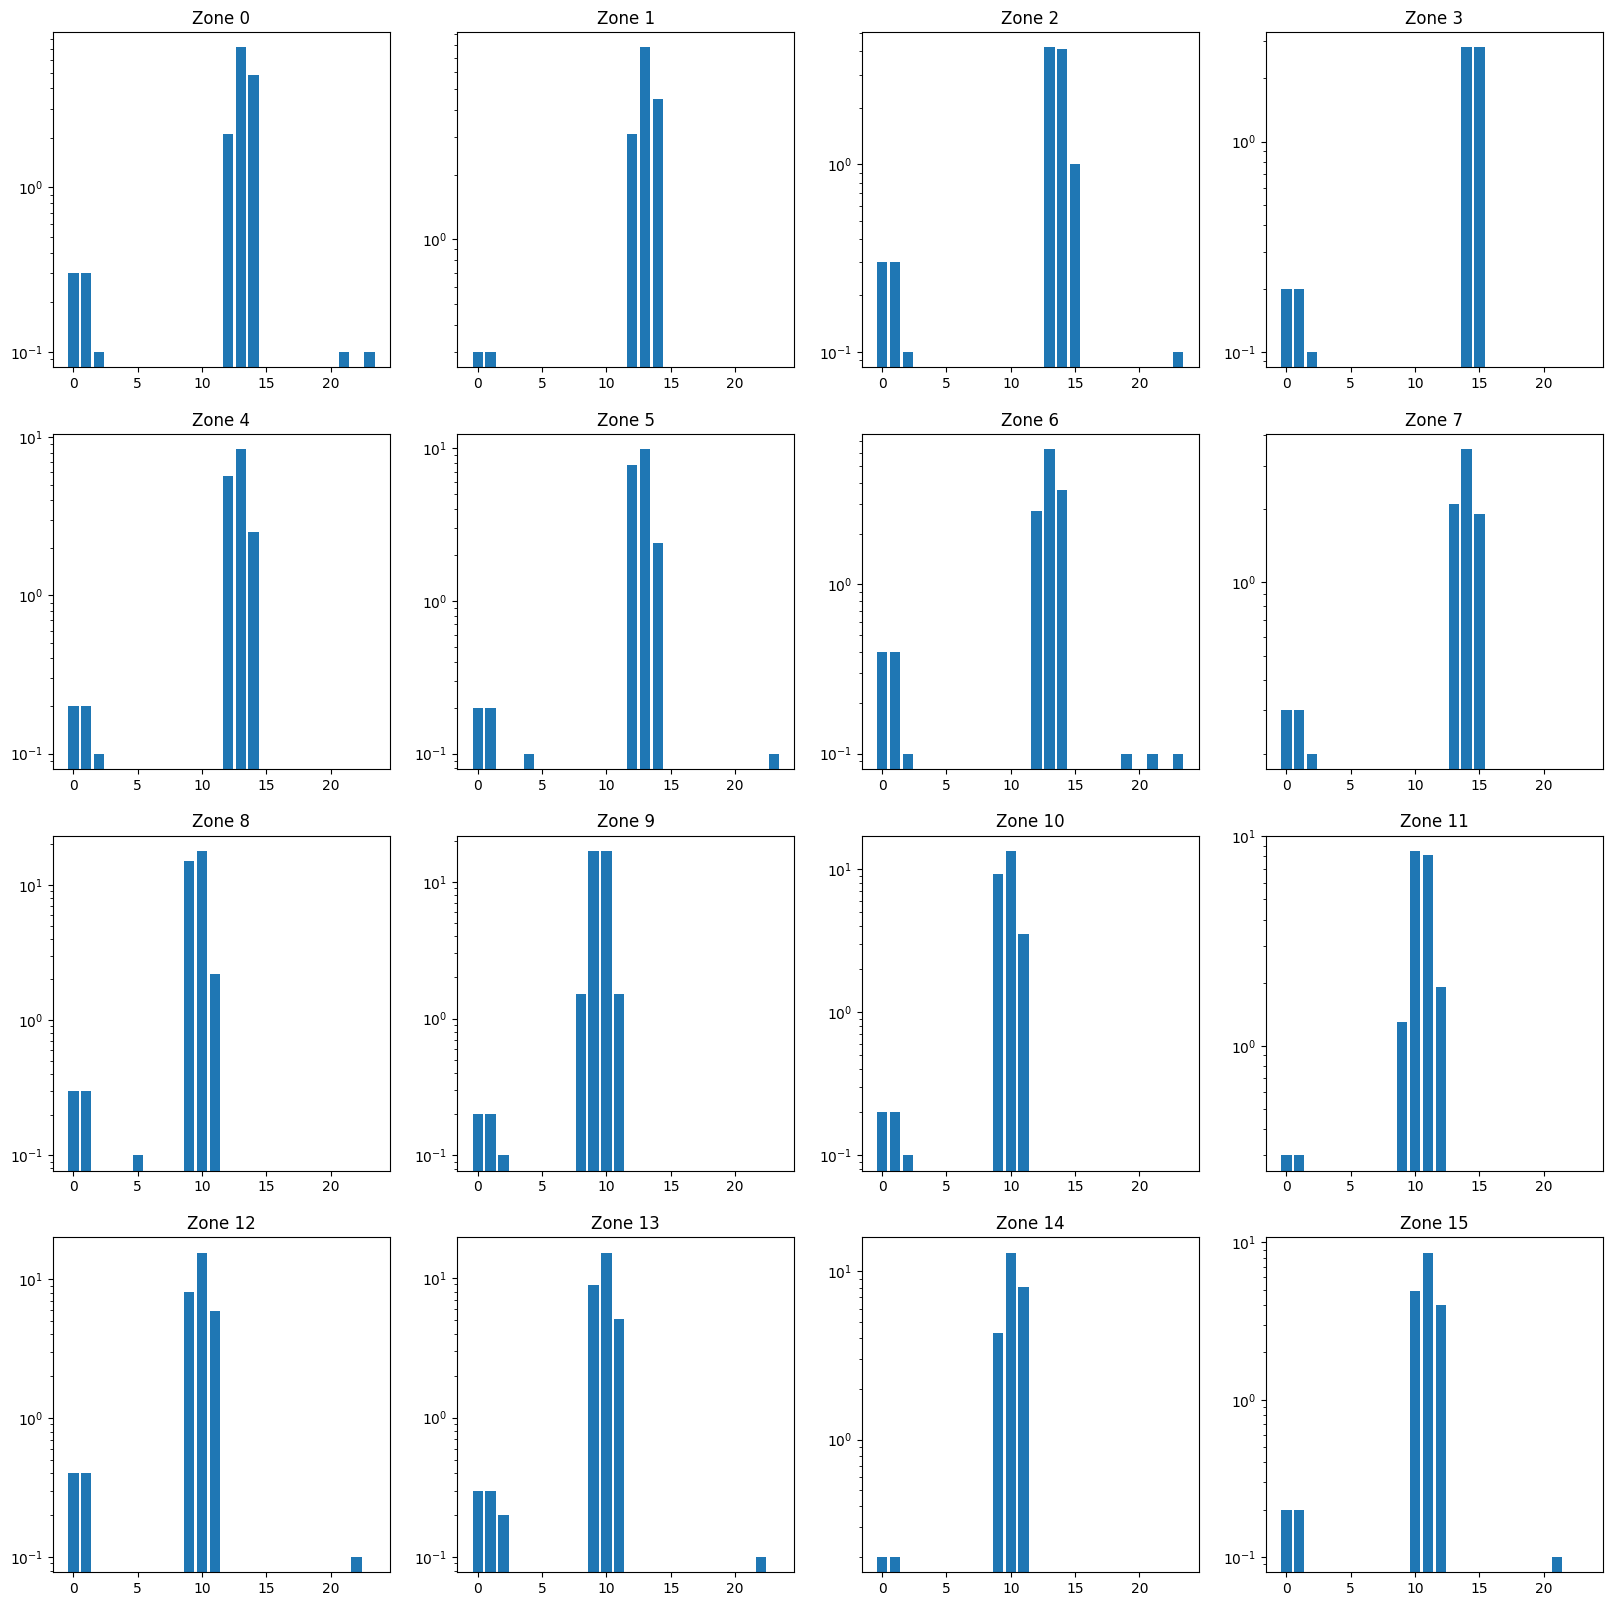

reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1845, 1892, 1953, 2023, 1839, 1897, 1955, 2034, 1389, 1426, 1472, 1530, 1388, 1431, 1472, 1524]
histograms: [[0.3, 0.3, 0.1, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.2, -0.4, -0.2, 2.2, 6.8, 4.9, -0.7, -0.0, -0.1, -0.0, -0.0, 0.0, -0.1, 0.0, -0.1], [0.3, 0.3, 0.1, -0.1, 0.1, 0.0, -0.0, 0.1, 0.0, -0.1, -0.5, -0.3, 2.9, 7.3, 4.5, -0.5, -0.1, -0.1, 0.1, 0.1, 0.0, -0.0, -0.1, -0.0], [0.2, 0.2, 0.1, -0.0, -0.1, -0.0, -0.0, -0.0, 0.0, -0.2, -0.4, -0.2, -0.7, 4.7

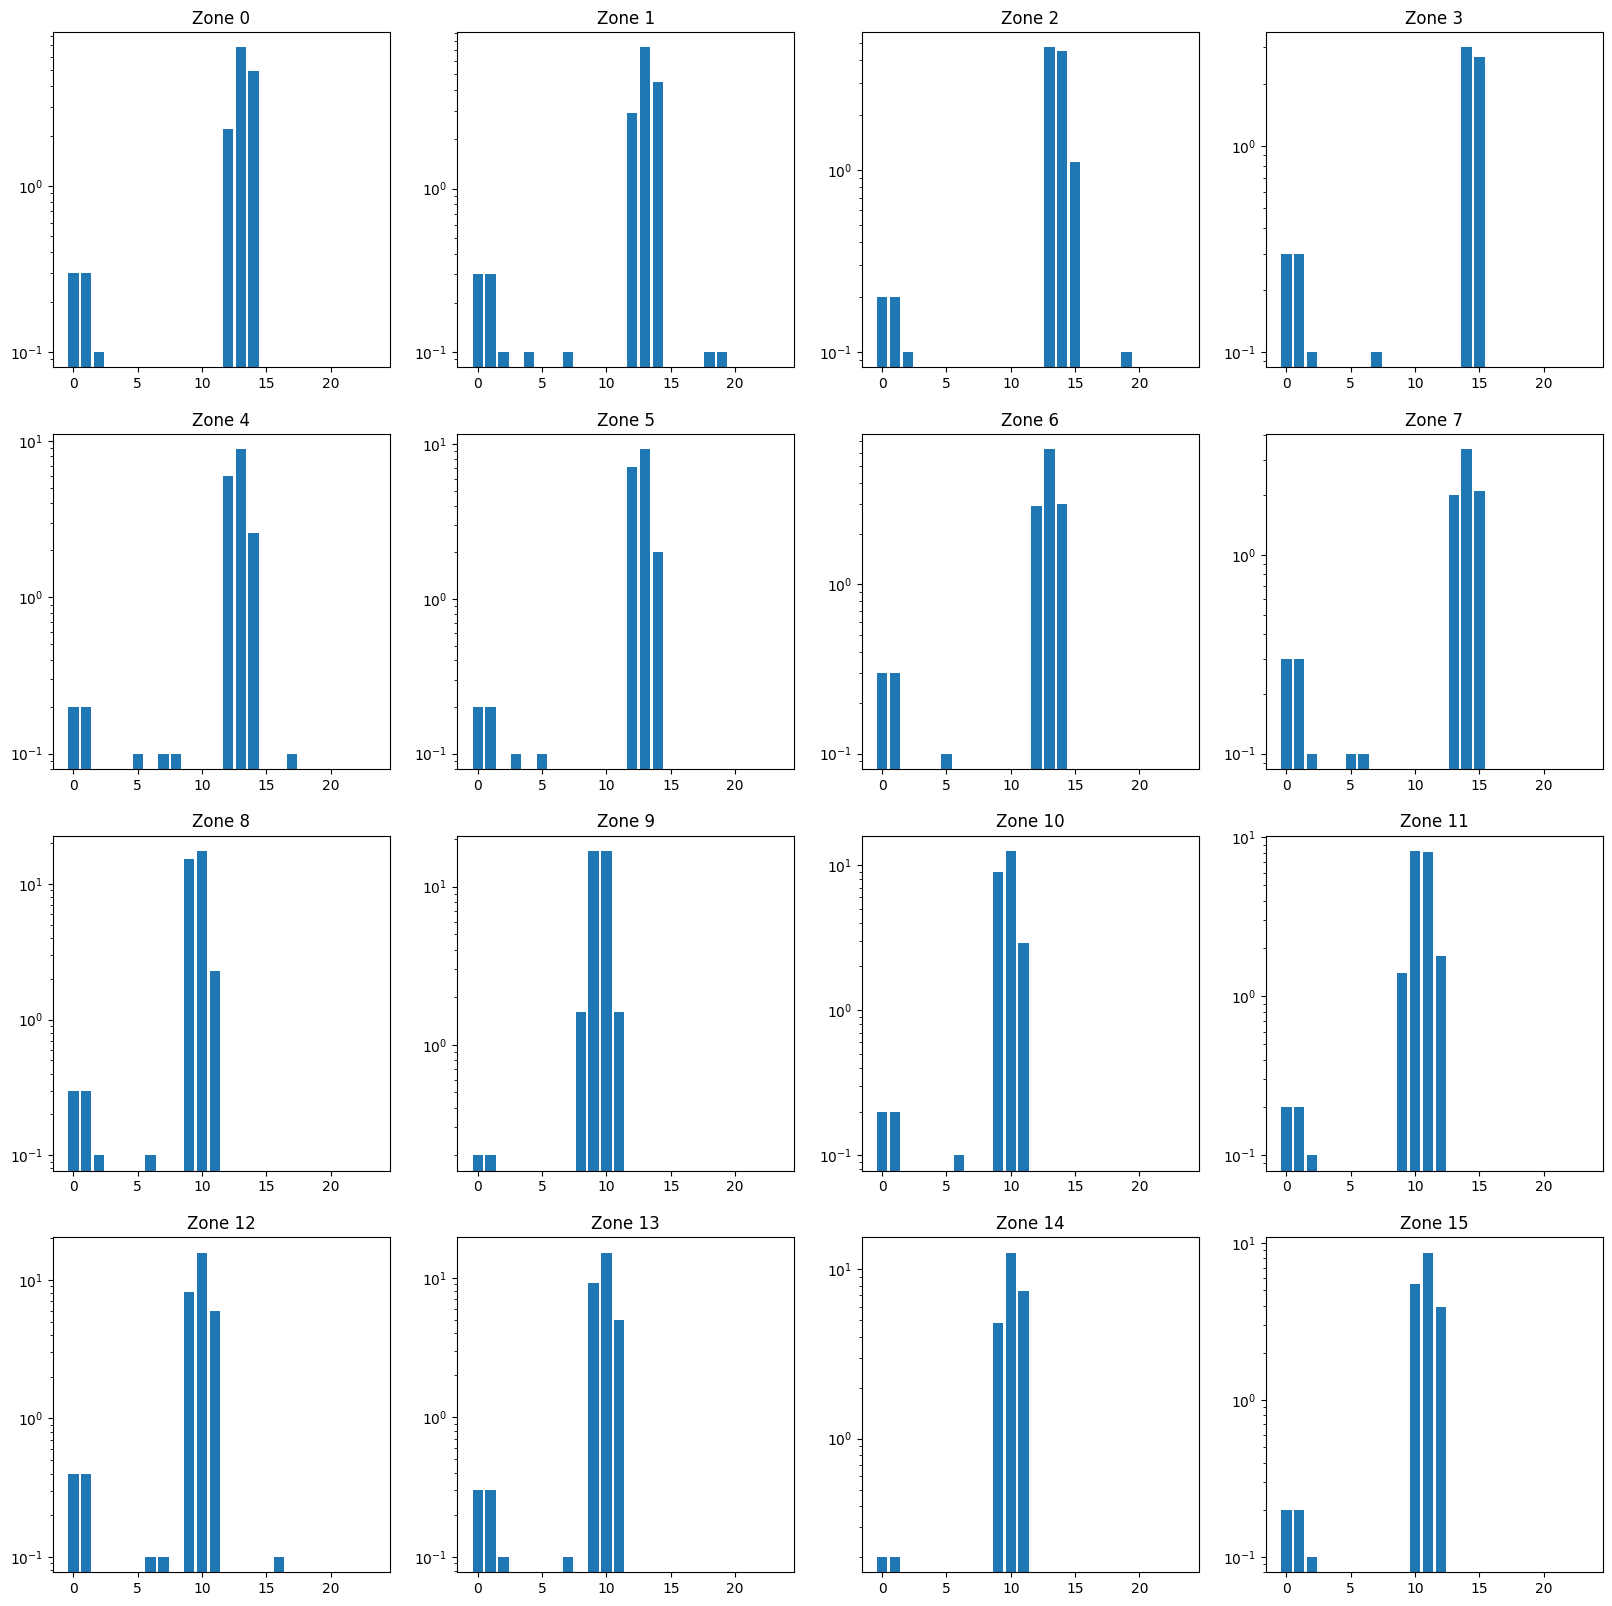

reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1834, 1893, 1954, 2031, 1835, 1899, 1957, 2026, 1387, 1430, 1475, 1526, 1387, 1432, 1477, 1528]
histograms: [[0.2, 0.2, 0.1, -0.0, 0.1, -0.0, -0.1, 0.1, -0.1, -0.3, -0.5, -0.3, 2.7, 7.0, 4.7, -0.6, -0.0, -0.0, -0.0, -0.1, -0.1, -0.2, 0.0, -0.1], [0.3, 0.3, 0.1, -0.0, -0.0, -0.1, 0.0, 0.1, -0.1, -0.2, -0.6, -0.3, 3.1, 7.6, 4.6, -0.6, -0.1, -0.1, -0.0, -0.0, -0.1, -0.1, -0.0, -0.1], [0.2, 0.2, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.3, -0.5, -0.3, -0.8

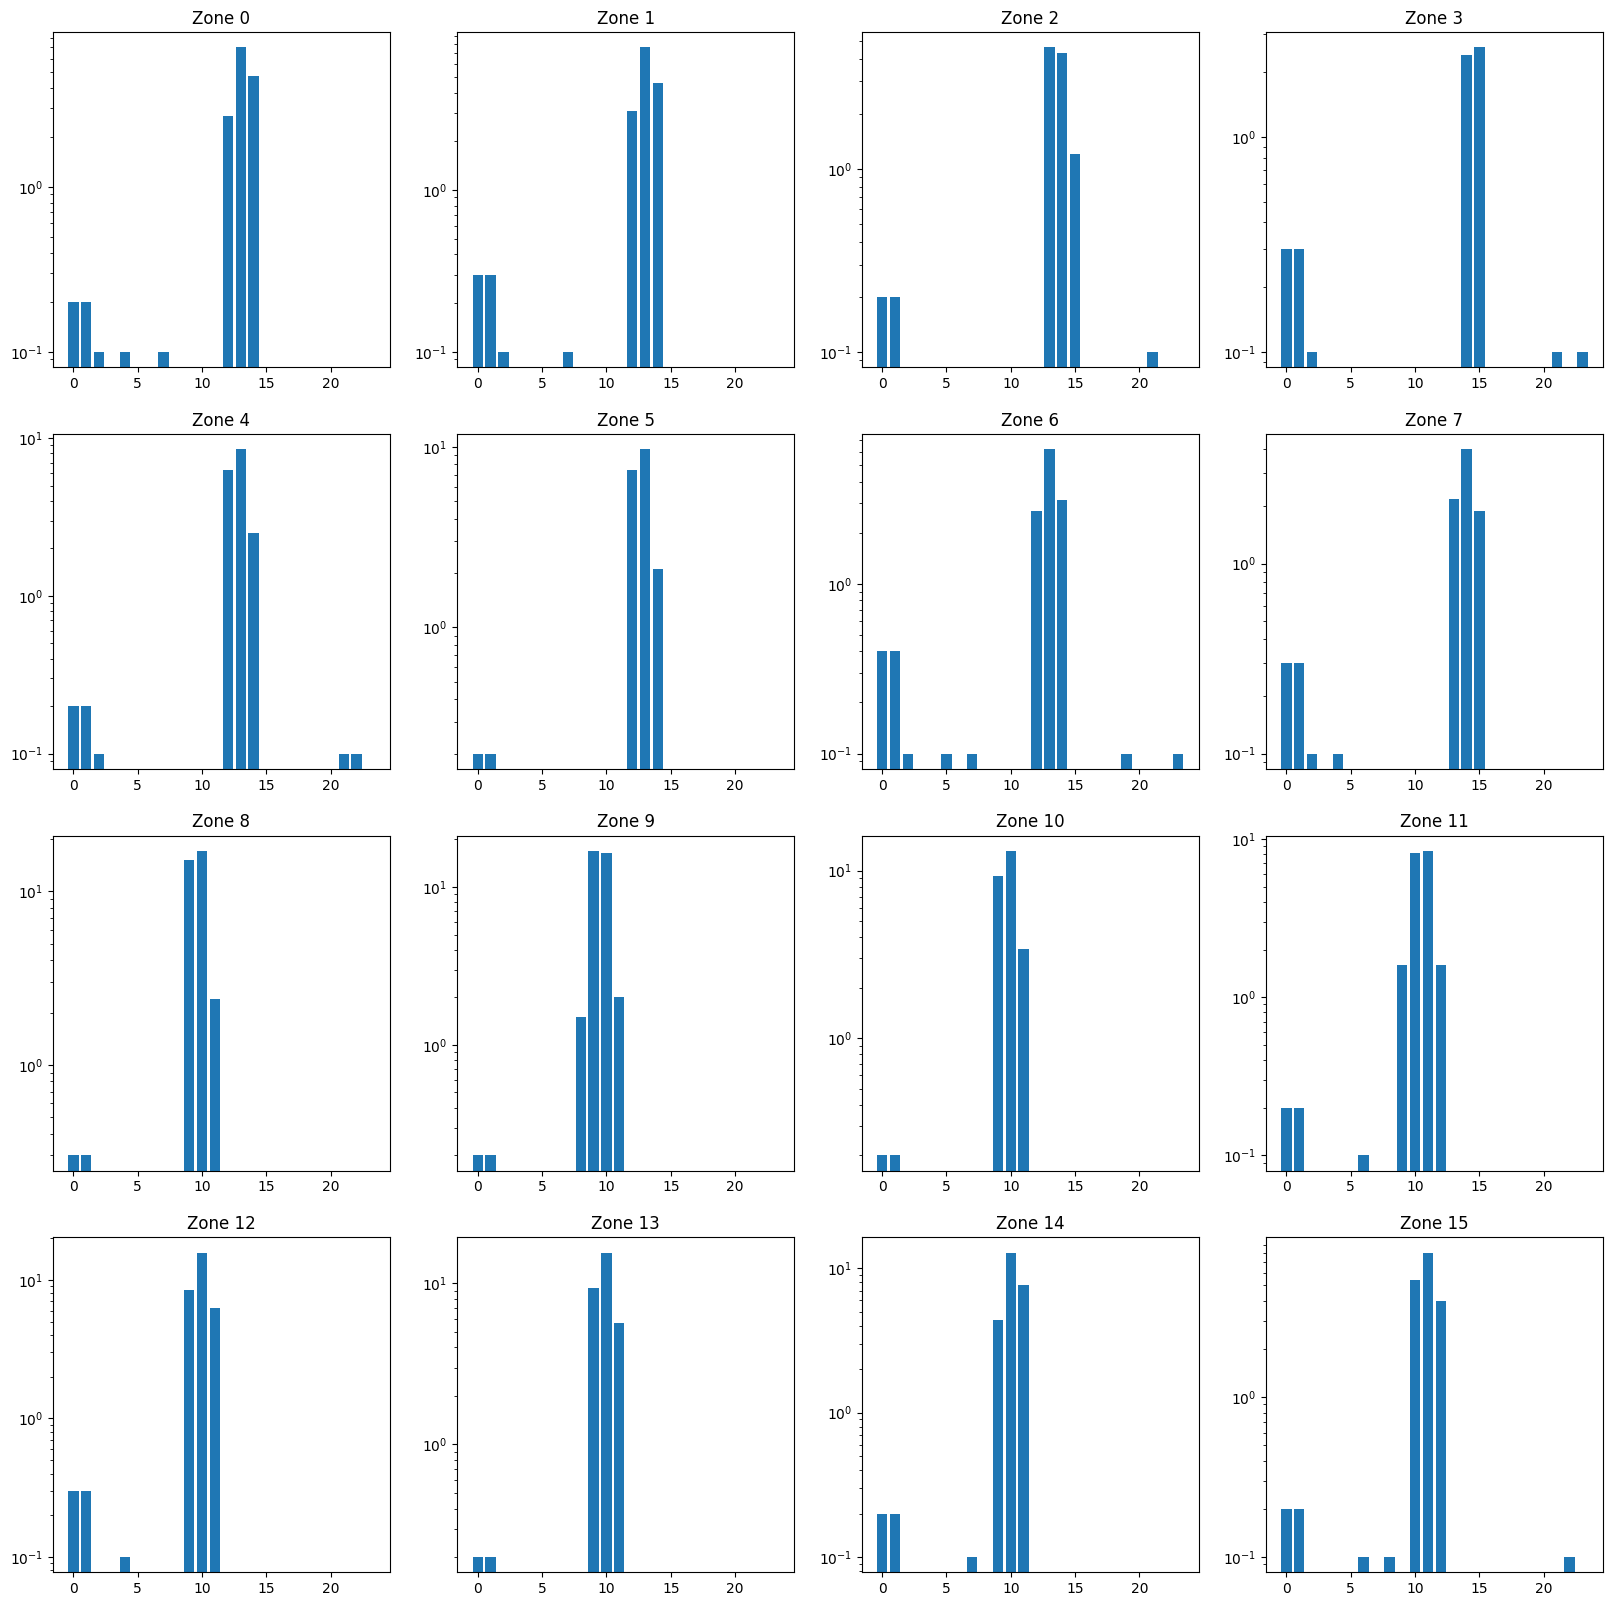

reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1837, 1893, 1960, 2030, 1848, 1897, 1962, 2026, 1386, 1429, 1475, 1528, 1386, 1431, 1473, 1527]
histograms: [[0.3, 0.3, 0.1, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.1, -0.5, -0.2, 2.2, 7.1, 4.5, -0.6, -0.0, 0.0, -0.0, -0.0, -0.2, 0.0, -0.1, 0.0], [0.3, 0.3, -0.1, -0.2, -0.0, -0.1, -0.0, -0.0, -0.0, -0.3, -0.8, -0.4, 2.8, 7.6, 4.3, -0.5, -0.1, 0.1, -0.1, -0.0, -0.1, -0.1, -0.0, 0.0], [0.2, 0.2, 0.0, 0.0, -0.1, -0.0, -0.1, 0.0, 0.1, -0.3, -0.5, -0.4, -0.8, 

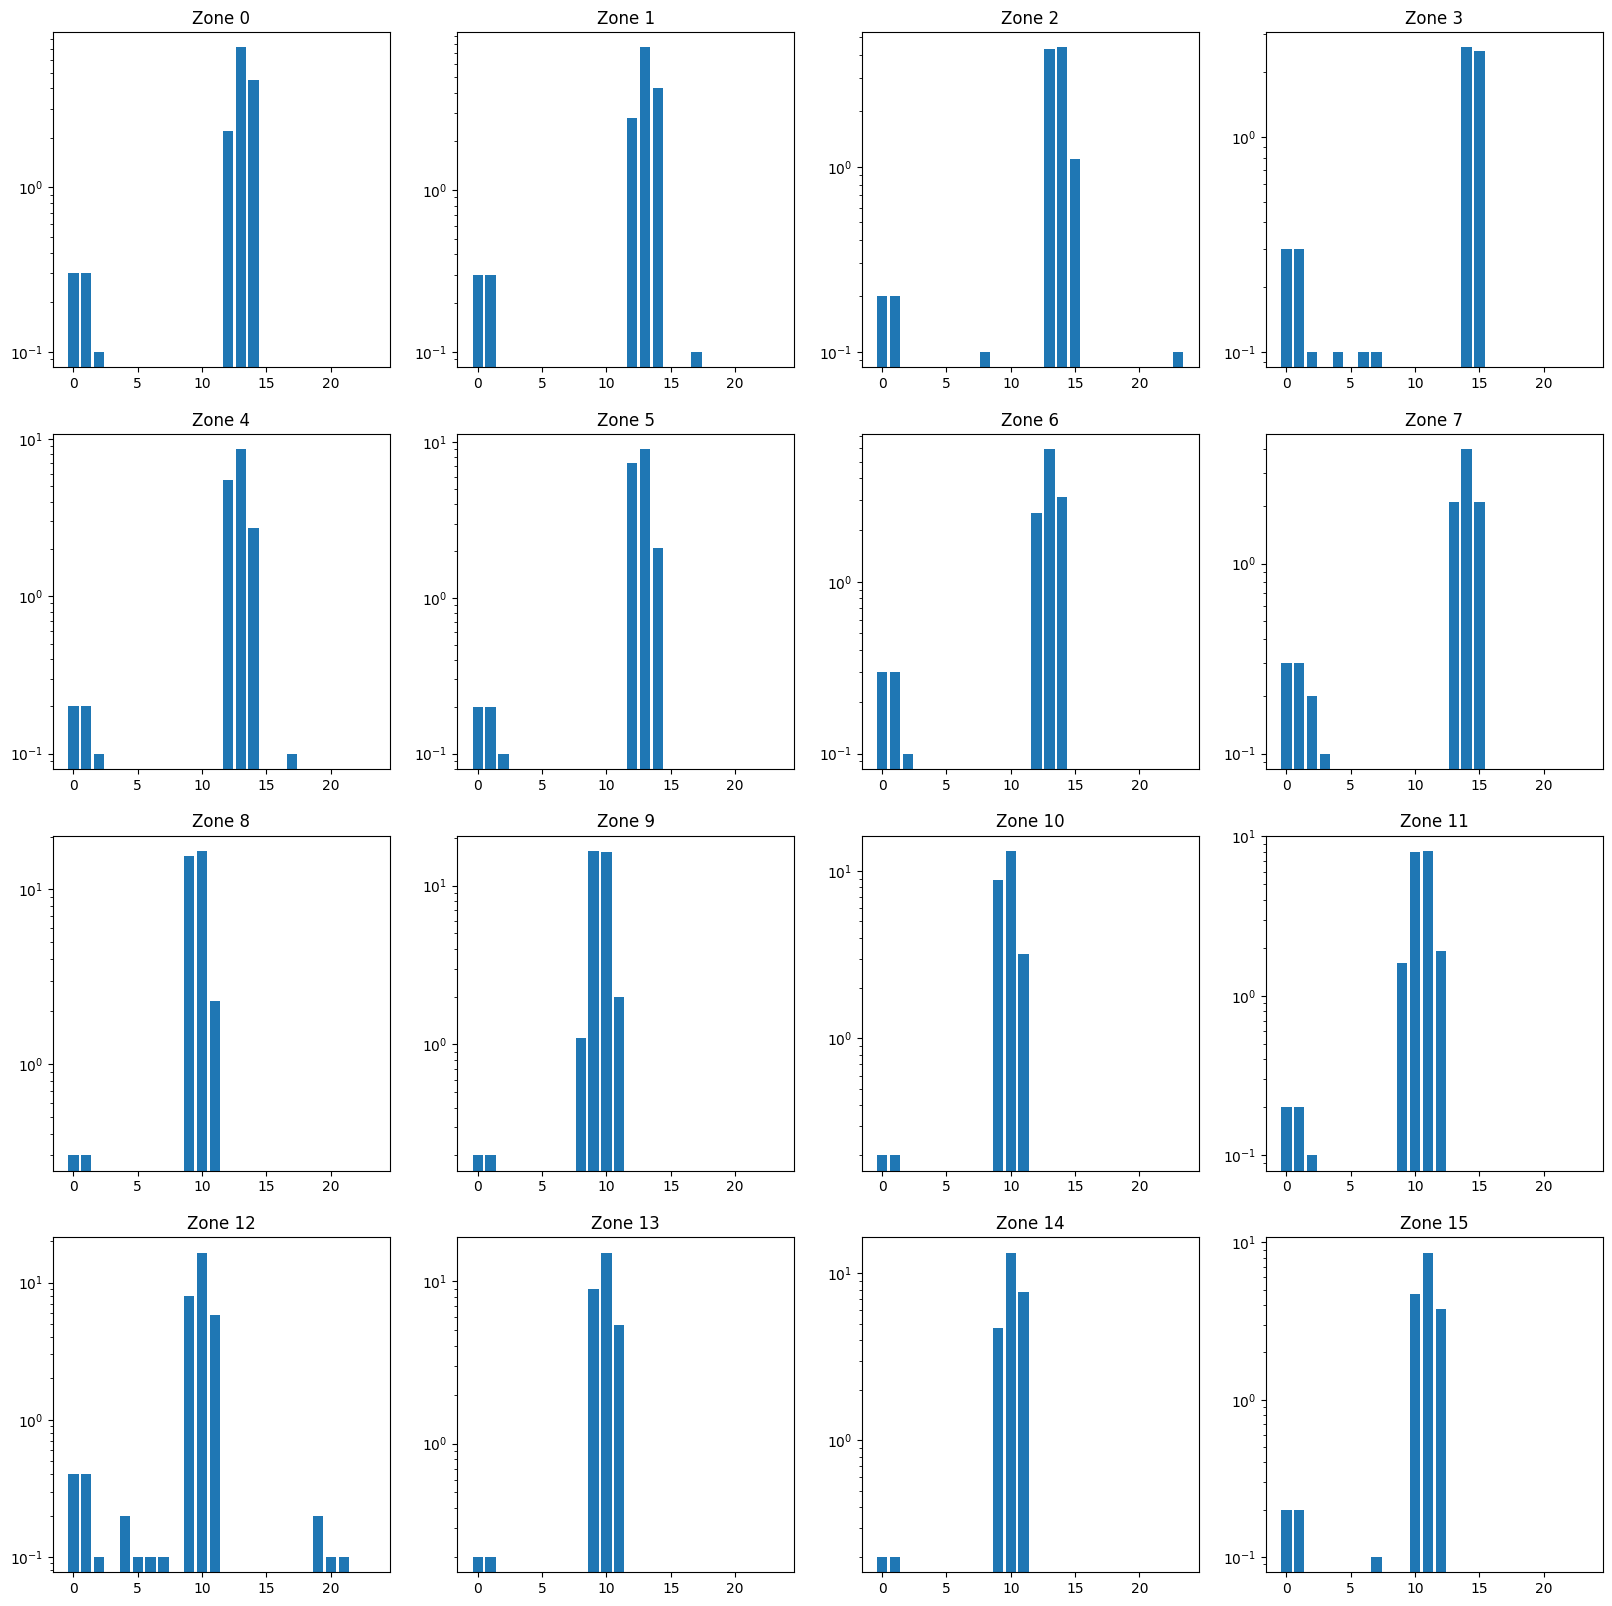

reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1838, 1893, 1957, 2038, 1839, 1898, 1962, 2031, 1384, 1423, 1473, 1530, 1390, 1428, 1473, 1531]
histograms: [[0.3, 0.3, 0.2, -0.1, -0.0, -0.0, 0.1, 0.0, 0.0, -0.3, -0.7, -0.2, 2.2, 7.0, 4.5, -0.5, -0.1, -0.0, -0.0, -0.1, 0.0, 0.0, 0.0, -0.1], [0.3, 0.3, 0.1, -0.1, -0.0, -0.0, 0.0, -0.0, -0.0, -0.4, -0.5, -0.1, 2.9, 7.6, 4.7, -0.3, -0.0, 0.0, -0.1, -0.0, 0.1, -0.0, 0.0, 0.0], [0.2, 0.2, -0.1, -0.0, -0.0, -0.0, -0.1, -0.0, -0.0, -0.3, -0.5, -0.3, -0.8,

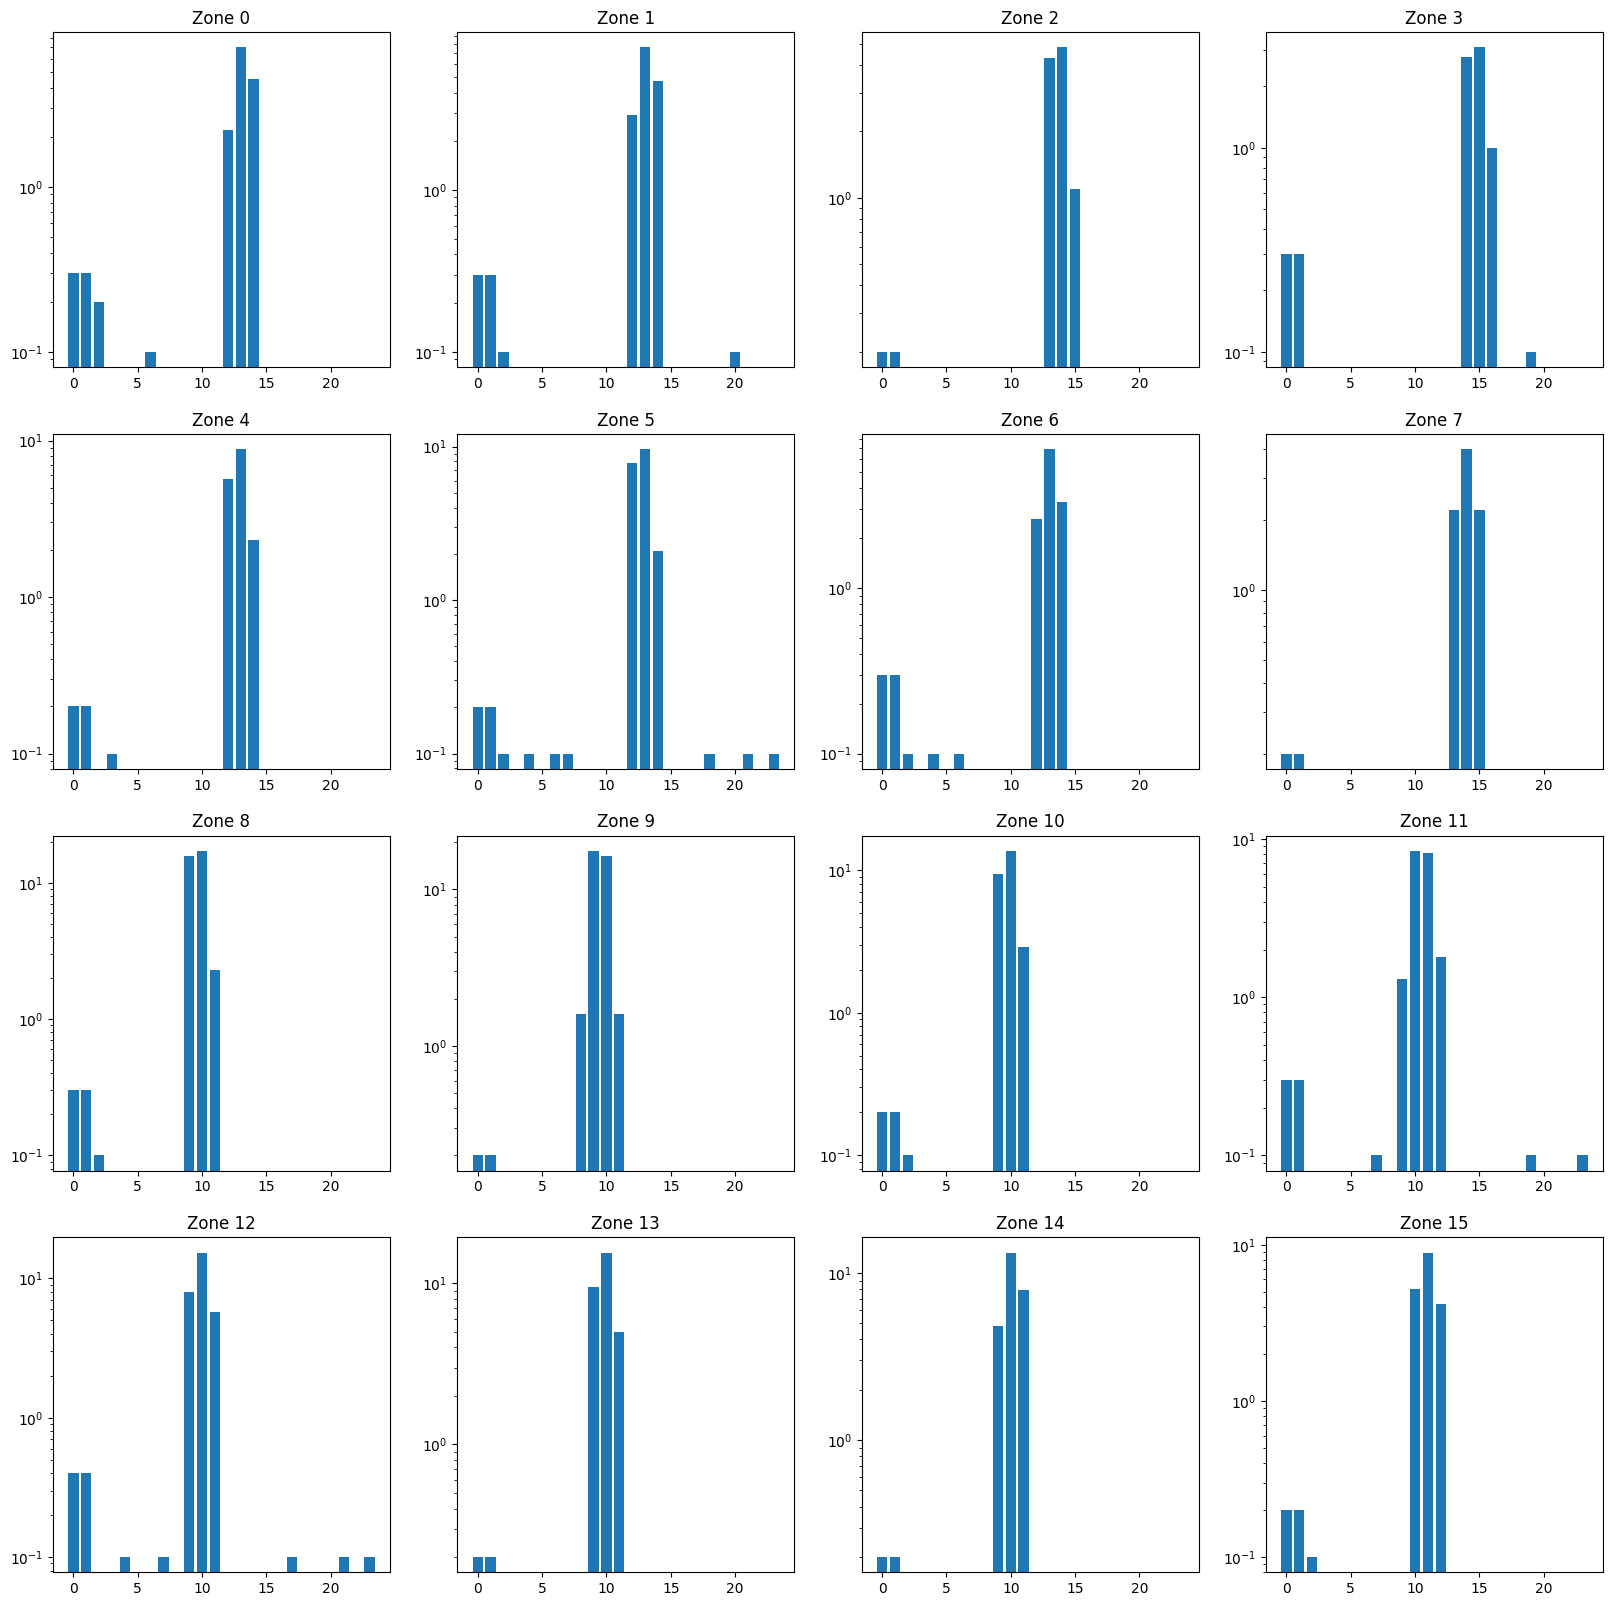

reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1836, 1892, 1955, 2022, 1839, 1891, 1957, 2034, 1386, 1433, 1474, 1523, 1387, 1434, 1480, 1535]
histograms: [[0.2, 0.2, 0.1, -0.0, 0.0, -0.0, 0.0, -0.1, -0.1, -0.3, -0.5, -0.2, 2.1, 7.6, 4.6, -0.5, -0.1, -0.1, -0.1, 0.0, -0.0, -0.0, -0.0, -0.0], [0.3, 0.3, 0.1, 0.0, -0.0, 0.1, 0.0, -0.0, 0.0, -0.2, -0.5, -0.2, 2.9, 7.8, 4.3, -0.5, -0.1, 0.1, -0.1, 0.0, 0.0, -0.0, -0.0, 0.1], [0.2, 0.2, 0.1, -0.1, -0.0, -0.1, -0.0, -0.0, 0.0, -0.3, -0.6, -0.4, -0.9, 4

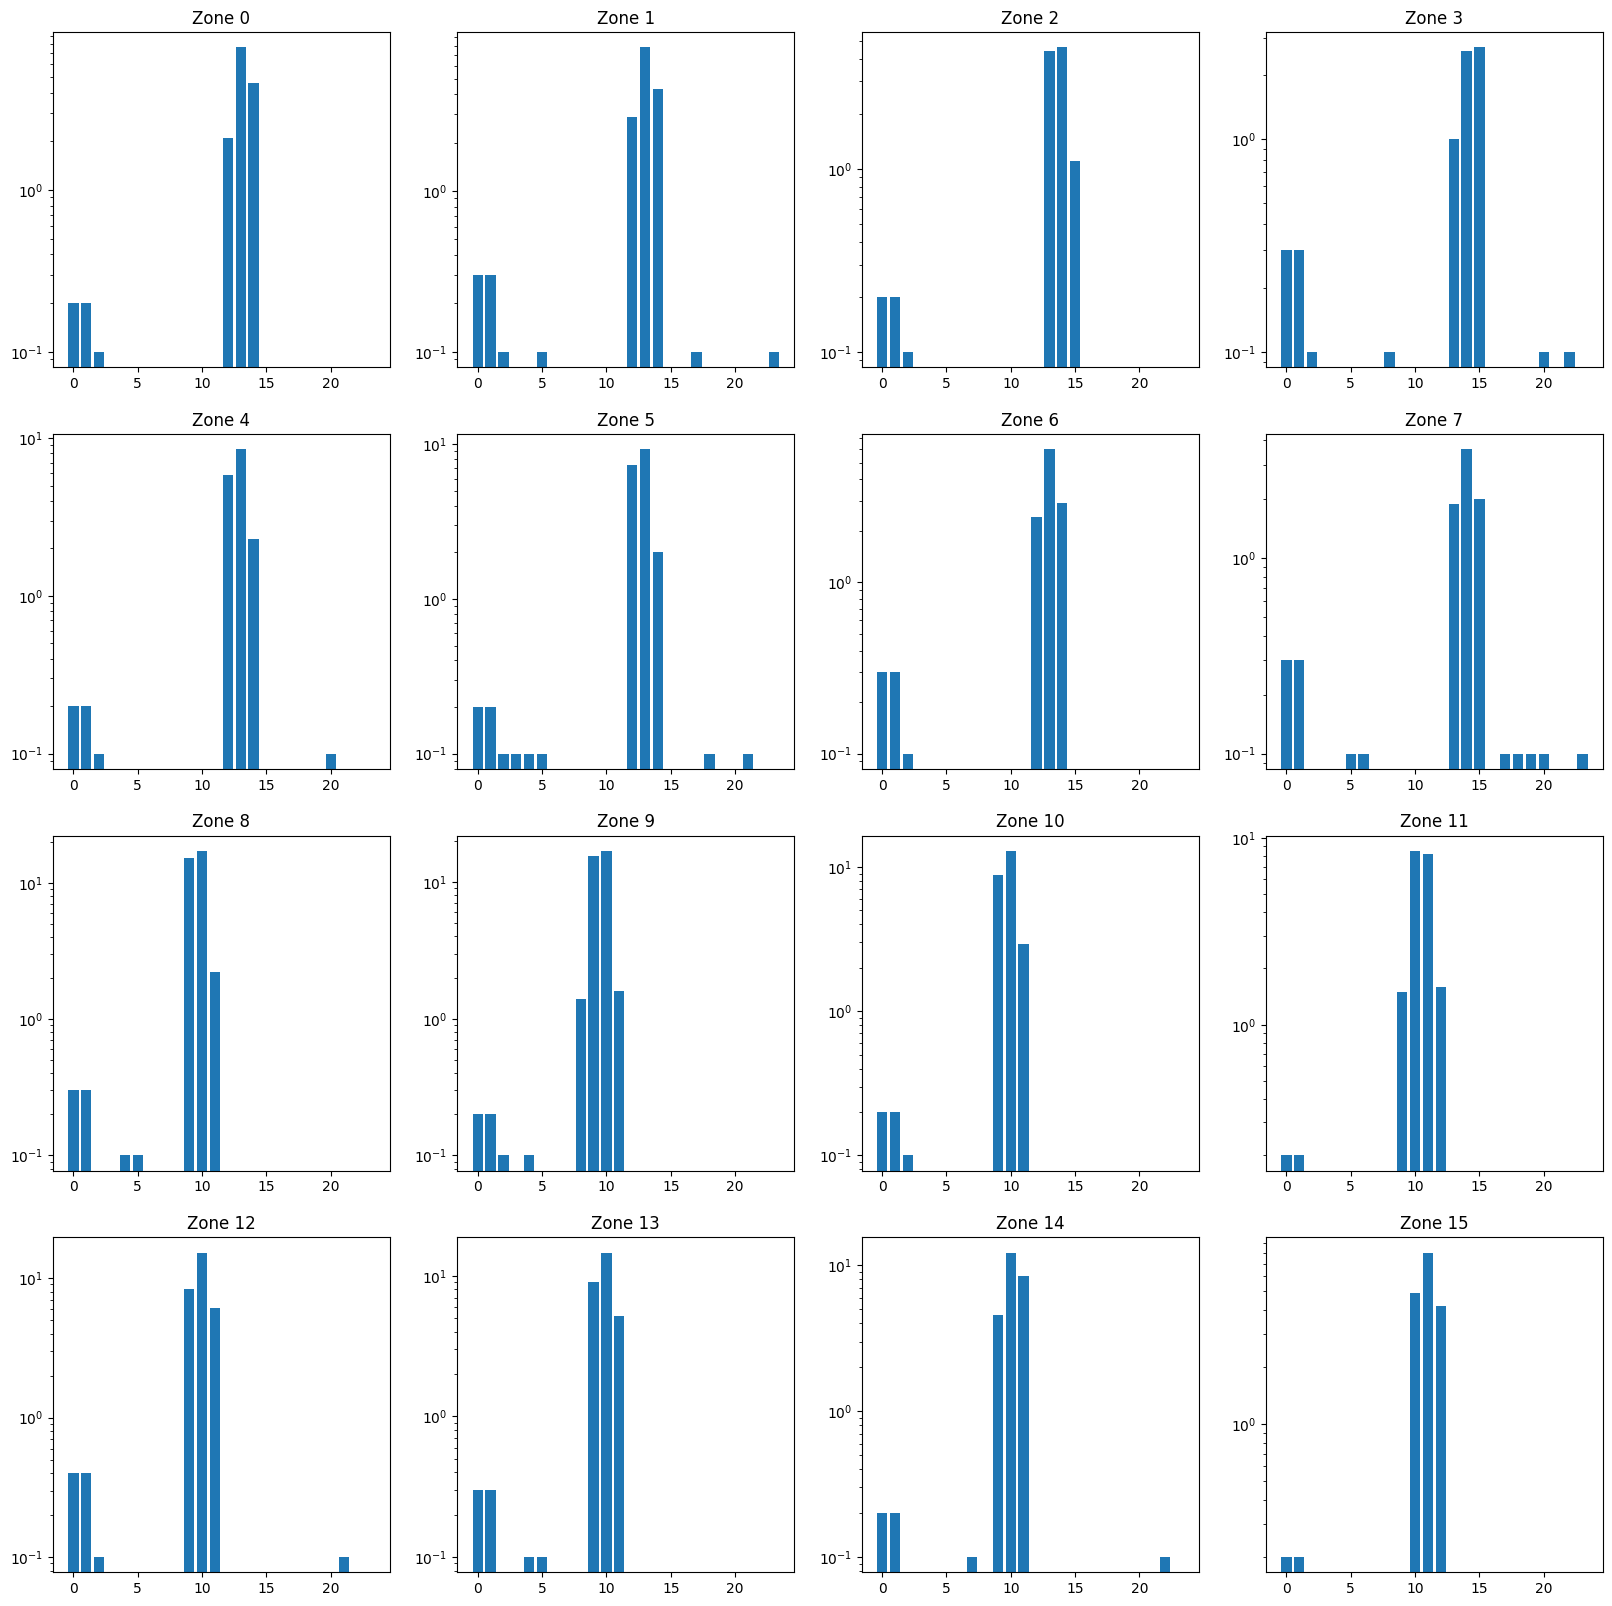

reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1834, 1891, 1957, 2031, 1842, 1892, 1963, 2031, 1384, 1427, 1471, 1532, 1389, 1429, 1475, 1527]
histograms: [[0.2, 0.2, 0.1, 0.0, 0.0, 0.1, -0.0, 0.1, -0.0, -0.3, -0.6, -0.2, 2.4, 7.5, 4.6, -0.6, -0.2, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.3, 0.3, 0.1, 0.1, -0.1, -0.0, -0.0, -0.0, -0.1, -0.3, -0.5, -0.3, 3.0, 7.8, 4.6, -0.3, -0.0, -0.0, 0.1, 0.0, -0.0, 0.0, -0.1, 0.0], [0.2, 0.2, 0.1, -0.1, -0.0, -0.0, -0.0, 0.0, -0.1, -0.2, -0.5, -0.2, -0.8, 4.

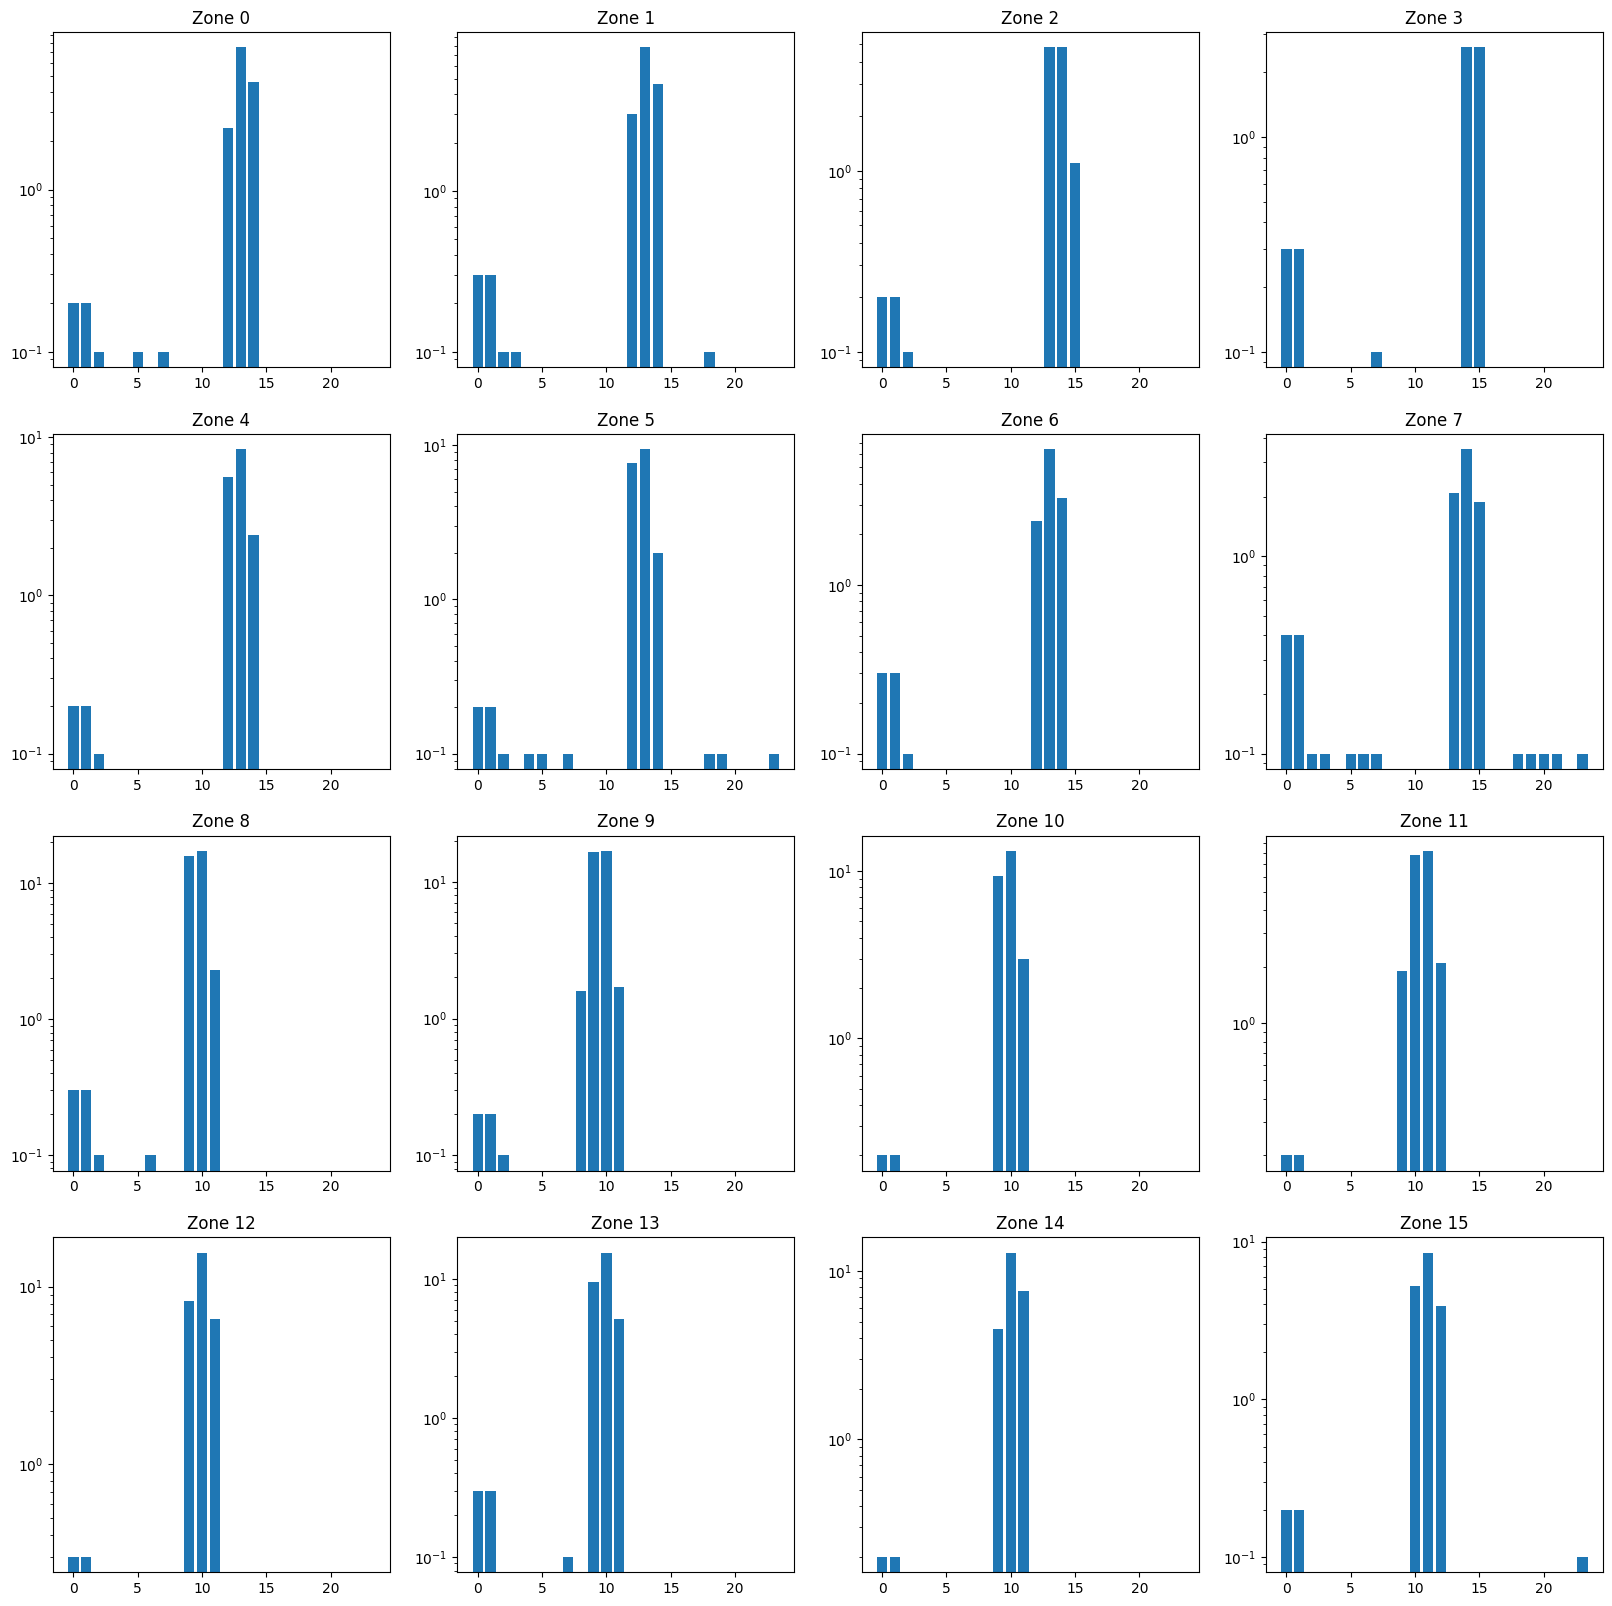

reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1843, 1894, 1949, 2019, 1842, 1898, 1960, 2031, 1387, 1428, 1475, 1534, 1390, 1430, 1478, 1530]
histograms: [[0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, -0.3, -0.4, -0.3, 2.0, 7.1, 4.6, -0.8, -0.1, -0.0, -0.0, -0.1, 0.0, -0.1, -0.0, -0.1], [0.3, 0.3, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, -0.1, -0.4, -0.5, -0.3, 2.6, 7.8, 4.5, -0.4, 0.0, -0.1, 0.0, 0.0, 0.0, -0.1, -0.0, 0.0], [0.3, 0.3, 0.1, -0.1, 0.1, 0.0, 0.0, 0.0, 0.1, -0.3, -0.6, -0.2, -0.9, 4.3, 4.3, 1

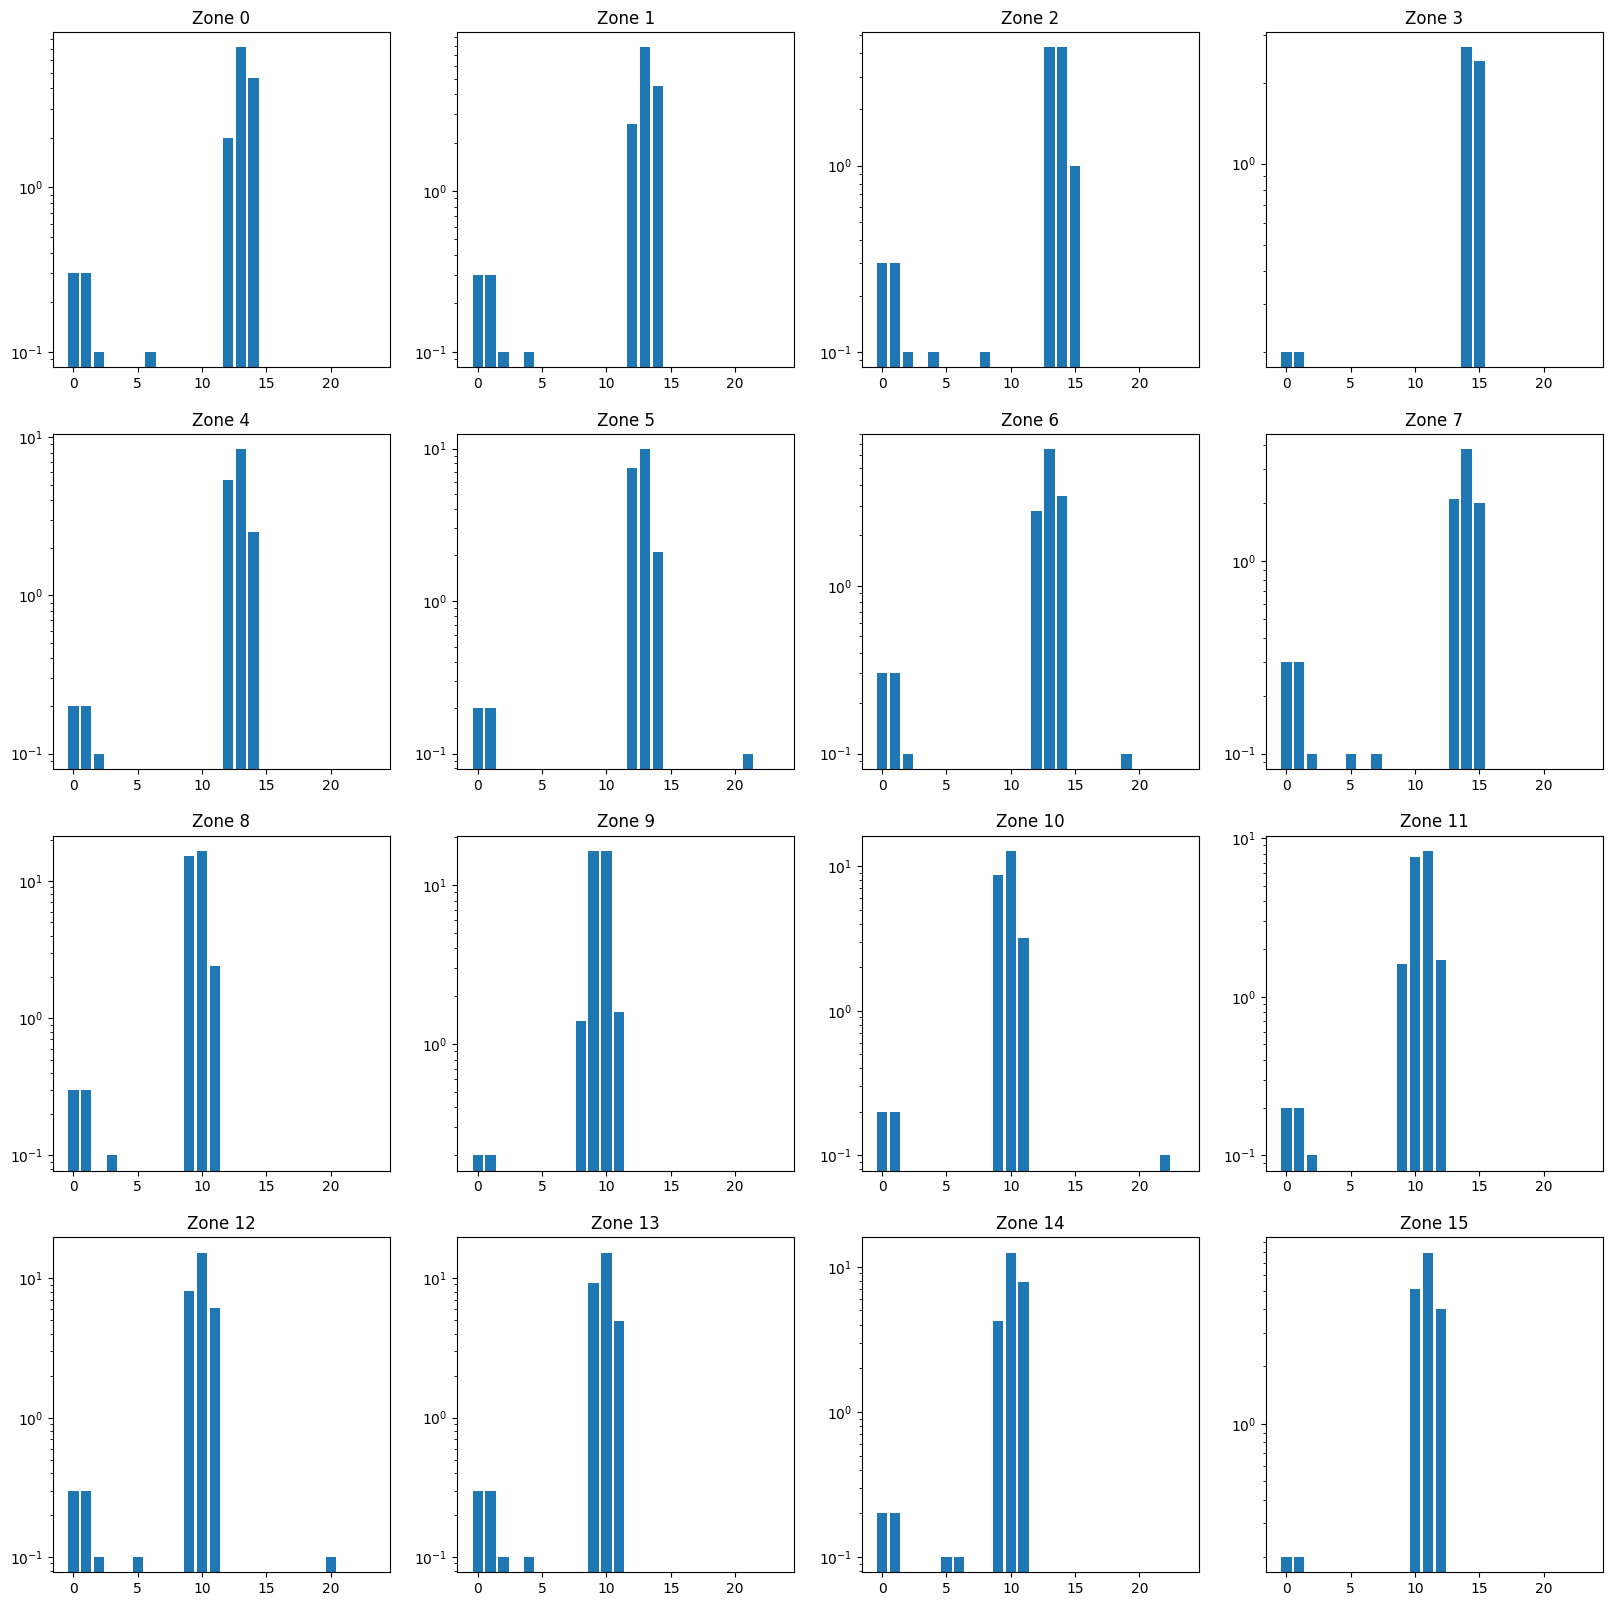

reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1837, 1895, 1946, 2033, 1842, 1897, 1952, 2032, 1384, 1430, 1471, 1528, 1386, 1431, 1475, 1534]
histograms: [[0.3, 0.3, 0.1, 0.0, 0.1, 0.1, 0.0, 0.1, -0.1, -0.2, -0.5, -0.2, 2.3, 7.4, 5.0, -0.4, -0.1, -0.0, -0.0, 0.1, 0.1, 0.0, 0.0, 0.0], [0.3, 0.3, 0.2, 0.0, -0.1, 0.0, -0.0, -0.0, -0.0, -0.3, -0.5, -0.4, 2.9, 7.6, 4.9, -0.3, -0.2, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.1], [0.3, 0.3, 0.1, -0.0, 0.0, 0.0, 0.1, 0.1, -0.1, -0.3, -0.4, -0.4, 1.0, 4.3, 4.3,

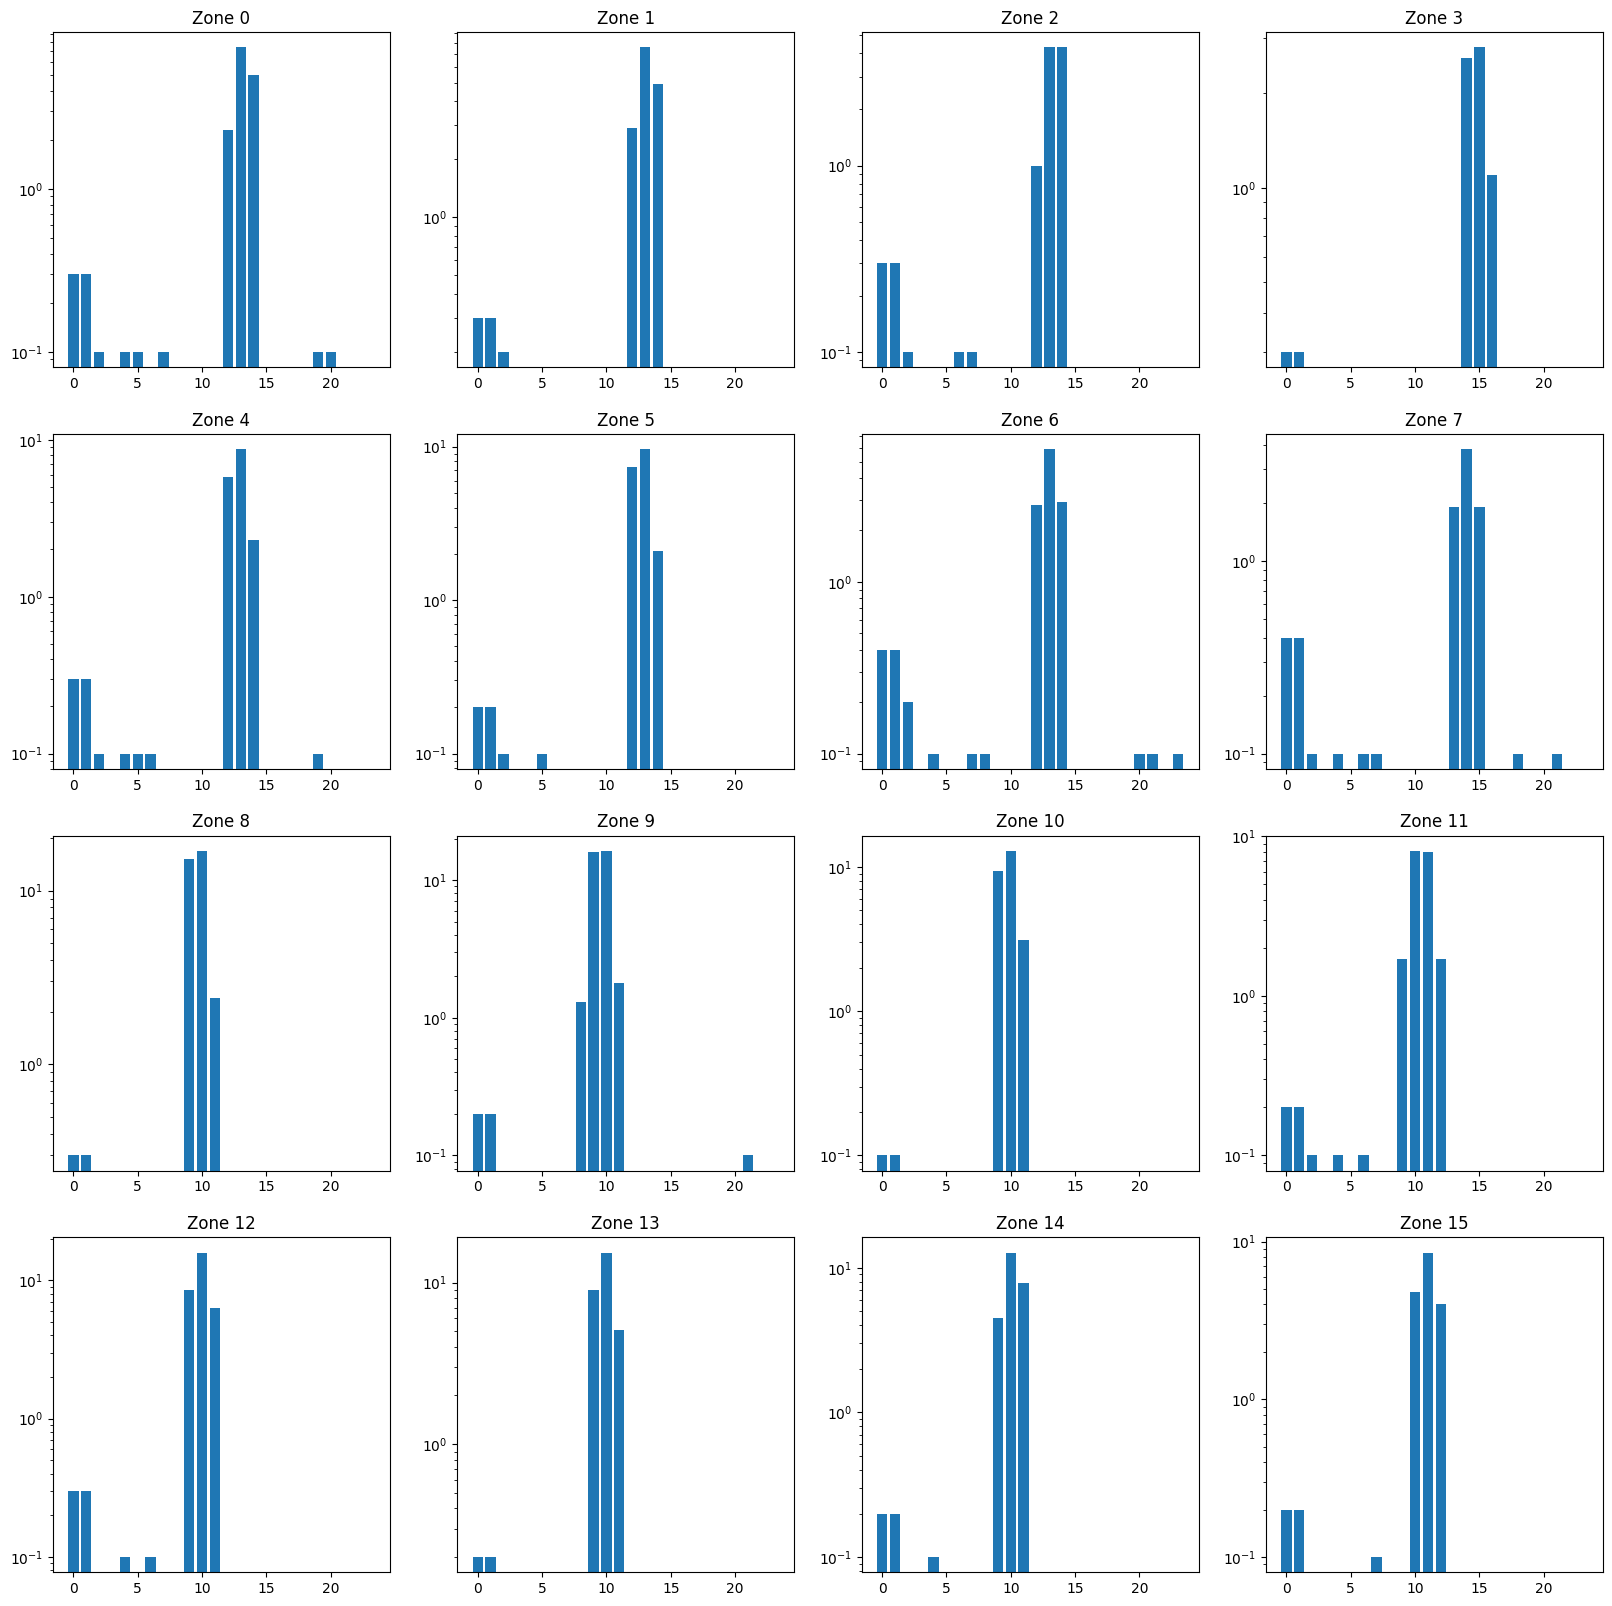

reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1838, 1892, 1957, 2034, 1838, 1893, 1963, 2037, 1387, 1429, 1475, 1530, 1393, 1434, 1477, 1529]
histograms: [[0.2, 0.2, 0.0, -0.1, 0.1, -0.0, -0.0, -0.1, -0.0, -0.4, -0.4, -0.3, 2.2, 7.0, 4.8, -0.4, -0.1, -0.0, 0.0, -0.1, -0.0, -0.0, -0.0, -0.0], [0.3, 0.3, 0.1, 0.0, 0.1, -0.0, -0.0, 0.0, -0.1, -0.4, -0.5, -0.2, 3.0, 8.2, 4.6, -0.4, -0.1, -0.0, 0.1, 0.0, -0.2, -0.0, -0.0, -0.0], [0.2, 0.2, 0.1, 0.0, -0.0, 0.0, -0.0, 0.1, -0.1, -0.4, -0.6, -0.3, -0.8,

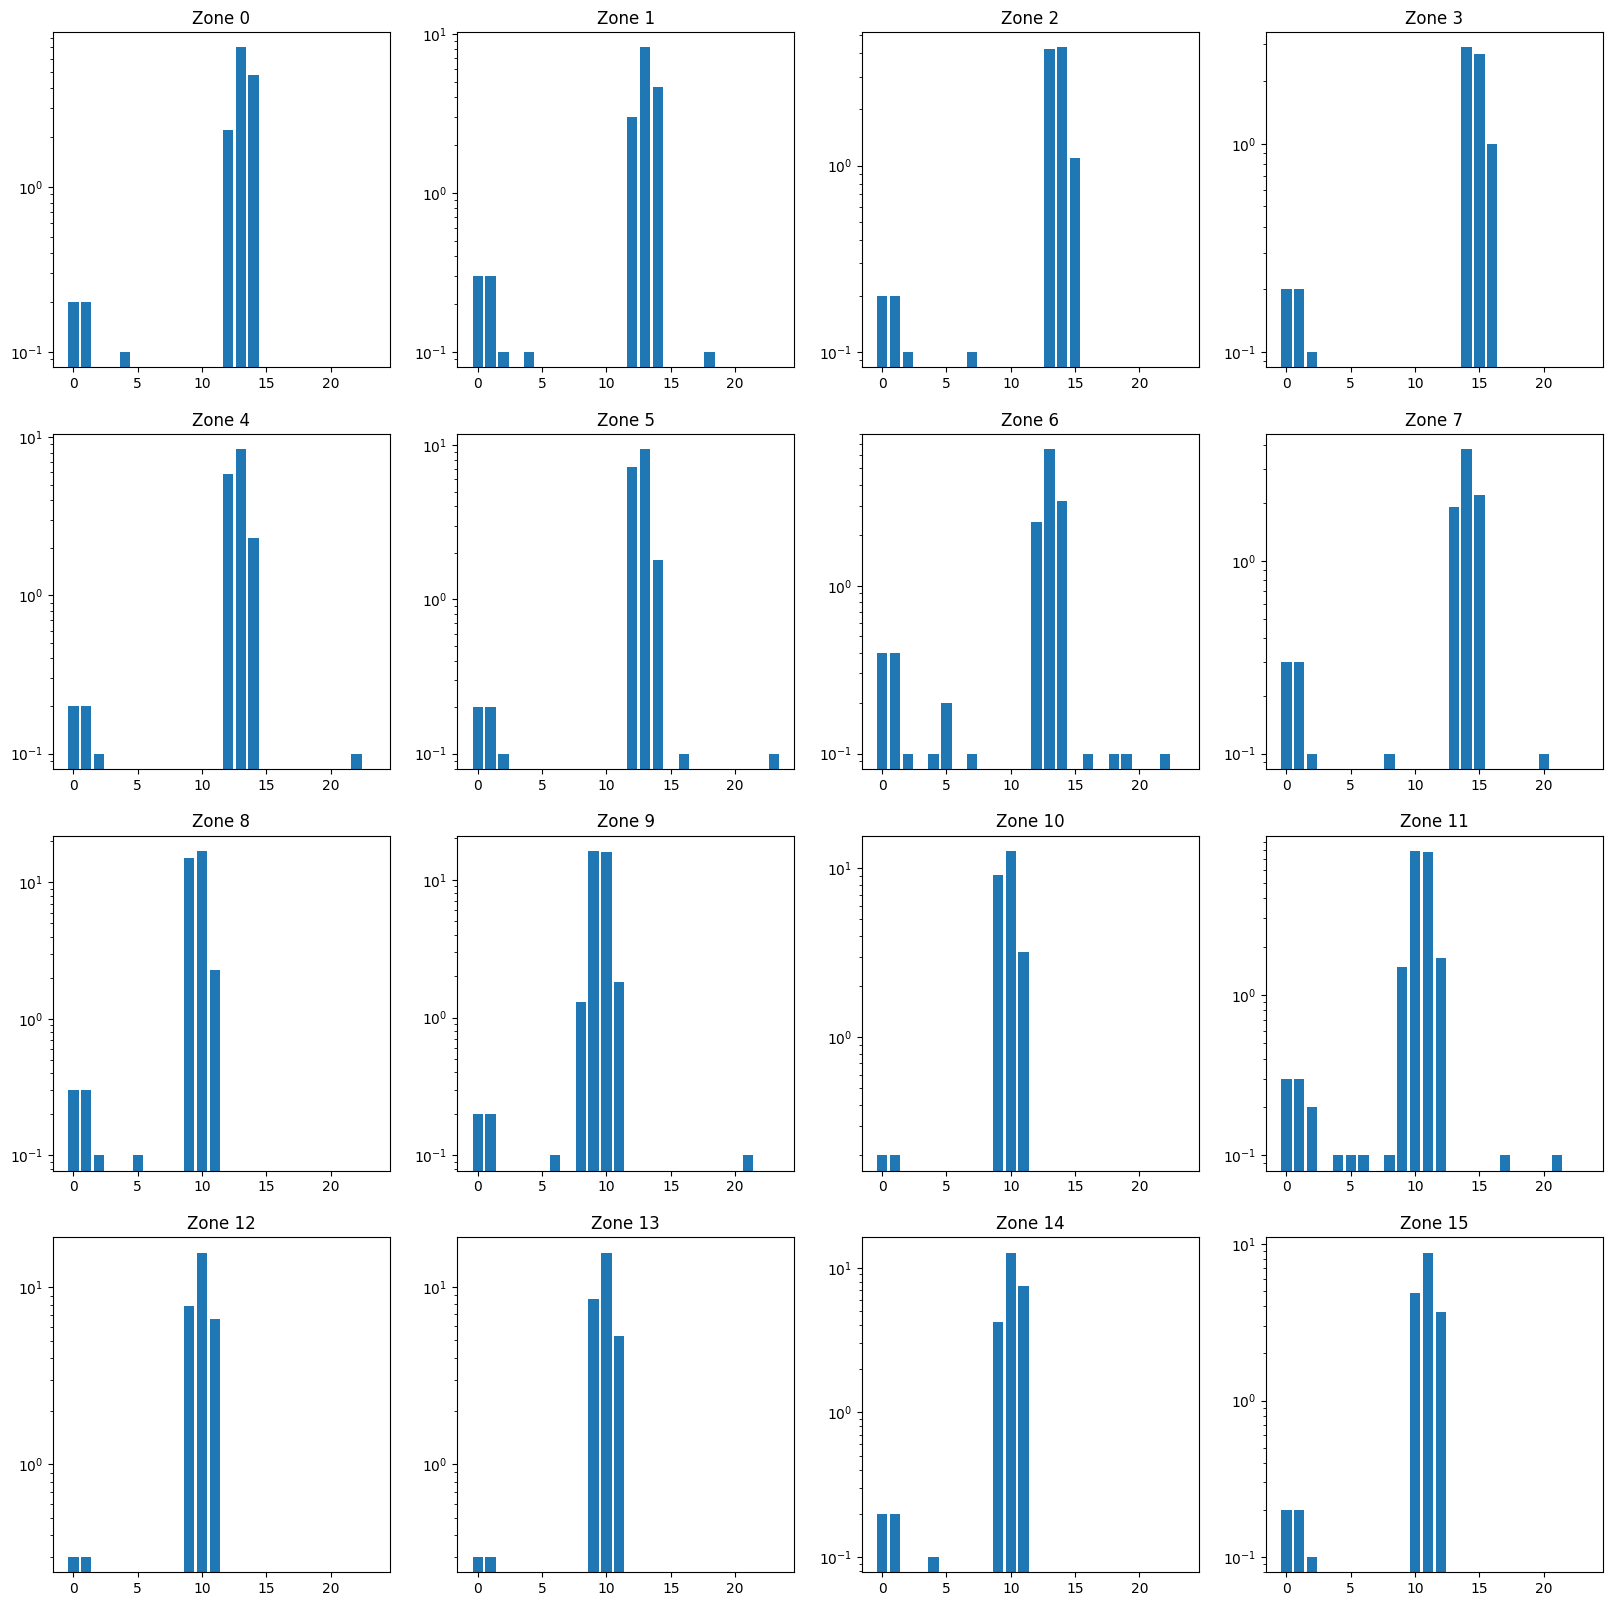

reading line
reading line
reading line
reading line
reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1843, 1887, 1953, 2035, 1842, 1895, 1961, 2033, 1387, 1428, 1470, 1532, 1388, 1428, 1476, 1531]
histograms: [[0.3, 0.3, 0.1, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.2, -0.6, -0.2, 2.1, 6.8, 4.8, -0.6, -0.1, 0.1, -0.0, -0.0, -0.1, -0.0, 0.0, -0.1], [0.3, 0.3, 0.1, -0.0, 0.0, -0.1, 0.0, 0.0, -0.0, -0.4, -0.5, -0.4, 3.3, 7.9, 4.6, -0.5, -0.0, -0.1, -0.1, -0.0, 0.0, -0.1, -0.1, -0.0], [0.3, 0.3, 0.1, -0.0,

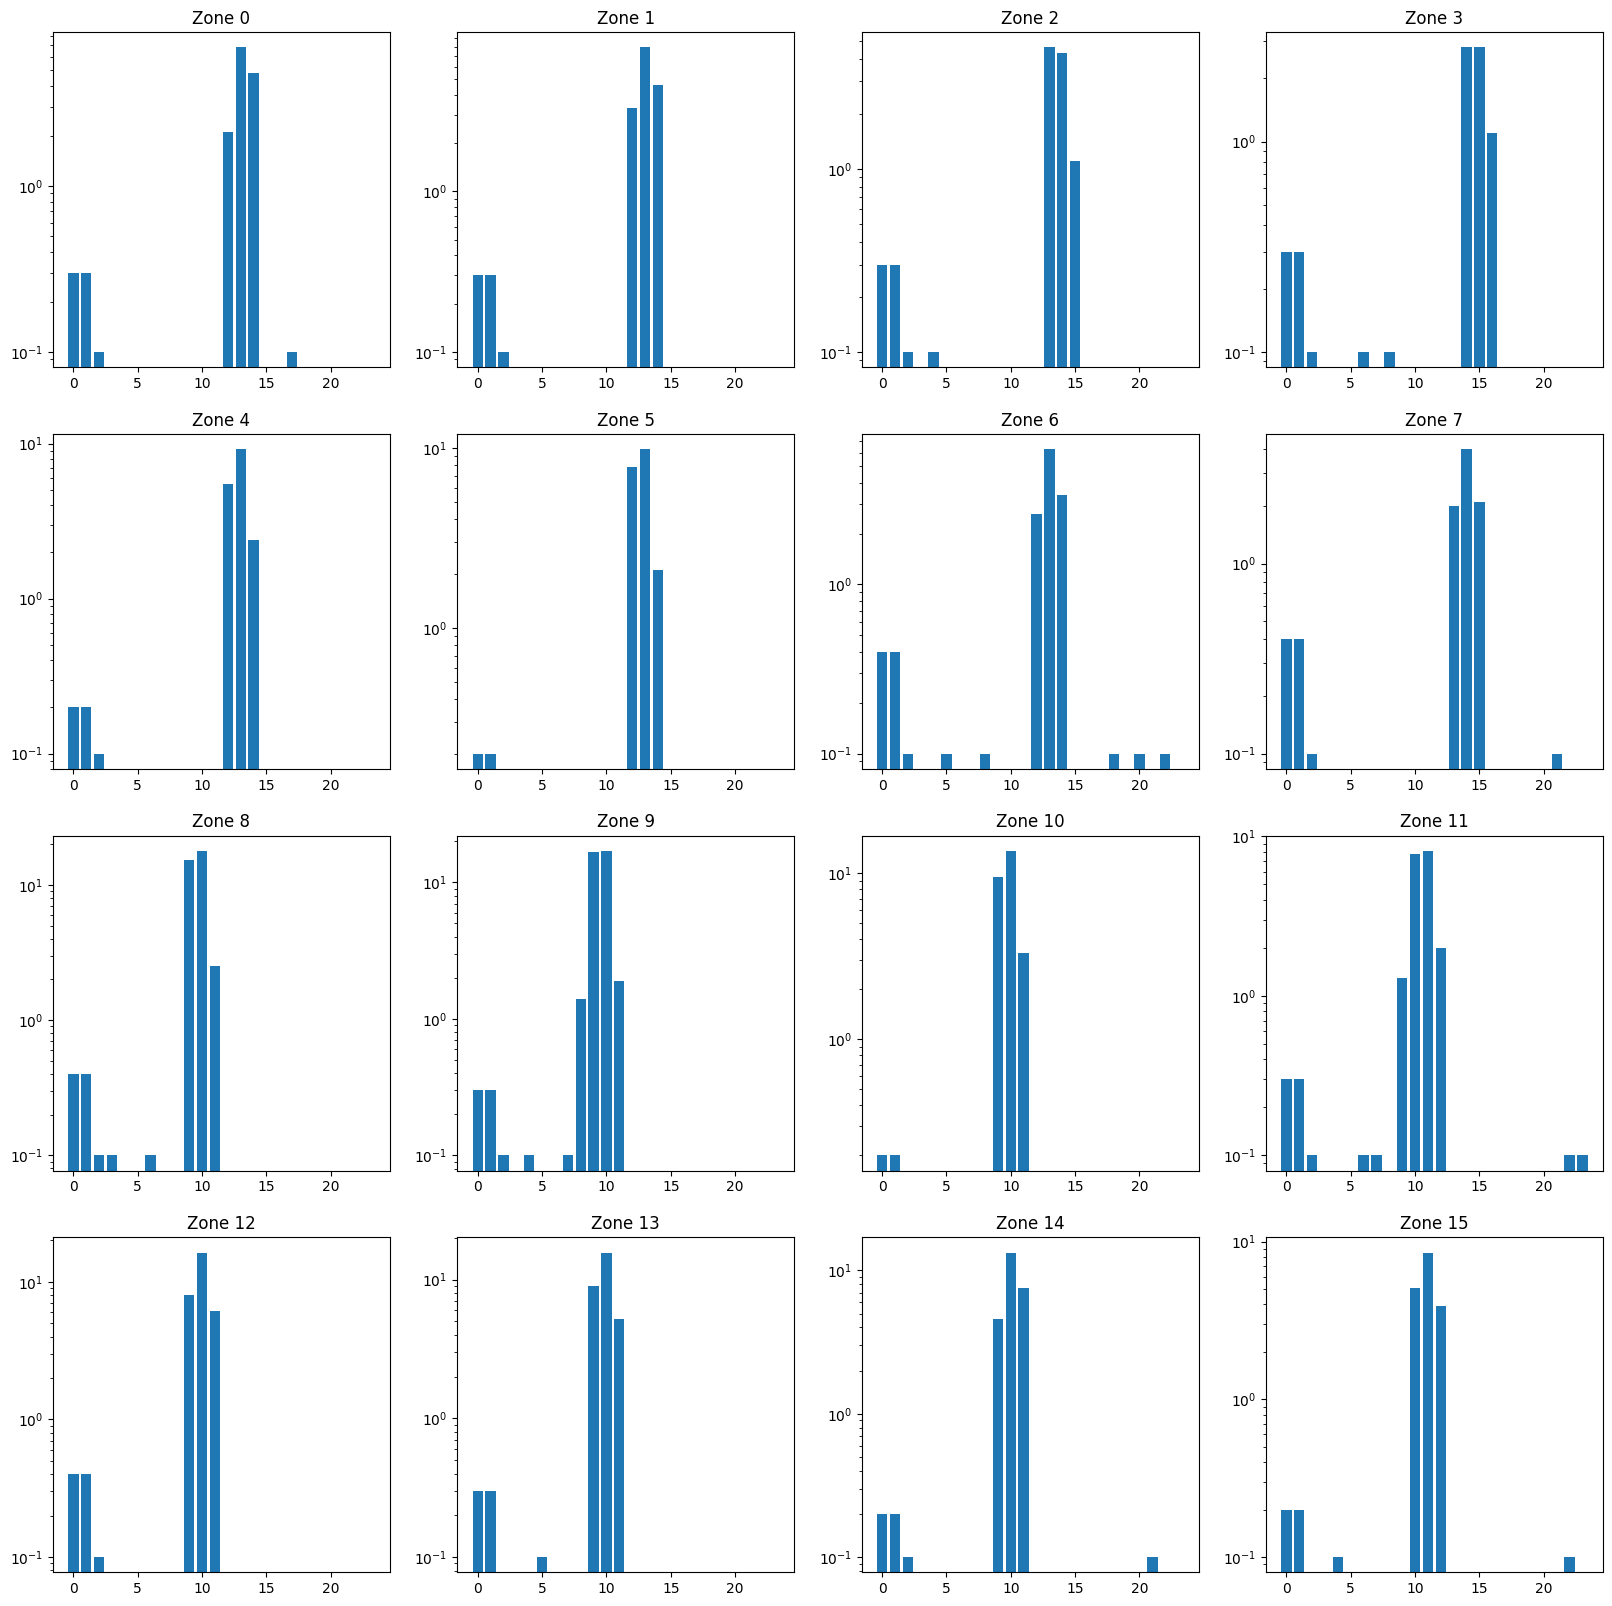

reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1835, 1891, 1954, 2024, 1837, 1898, 1955, 2037, 1386, 1429, 1470, 1526, 1385, 1433, 1472, 1531]
histograms: [[0.2, 0.2, 0.0, -0.1, -0.1, -0.0, -0.0, -0.1, -0.0, -0.4, -0.6, -0.4, 2.4, 6.6, 4.6, -0.6, -0.0, 0.0, -0.0, -0.1, -0.1, -0.0, -0.0, 0.0], [0.3, 0.3, 0.1, -0.2, -0.0, -0.1, 0.0, -0.1, -0.1, -0.2, -0.6, -0.4, 2.8, 7.8, 4.3, -0.5, -0.1, -0.0, 0.0, -0.2, -0.0, -0.0, -0.0, 0.0], [0.3, 0.3, 0.1, 0.0, -0.1, 0.1, 0.0, 0.0, 0.1, -0.2, -0.6, -0.2, -0.8,

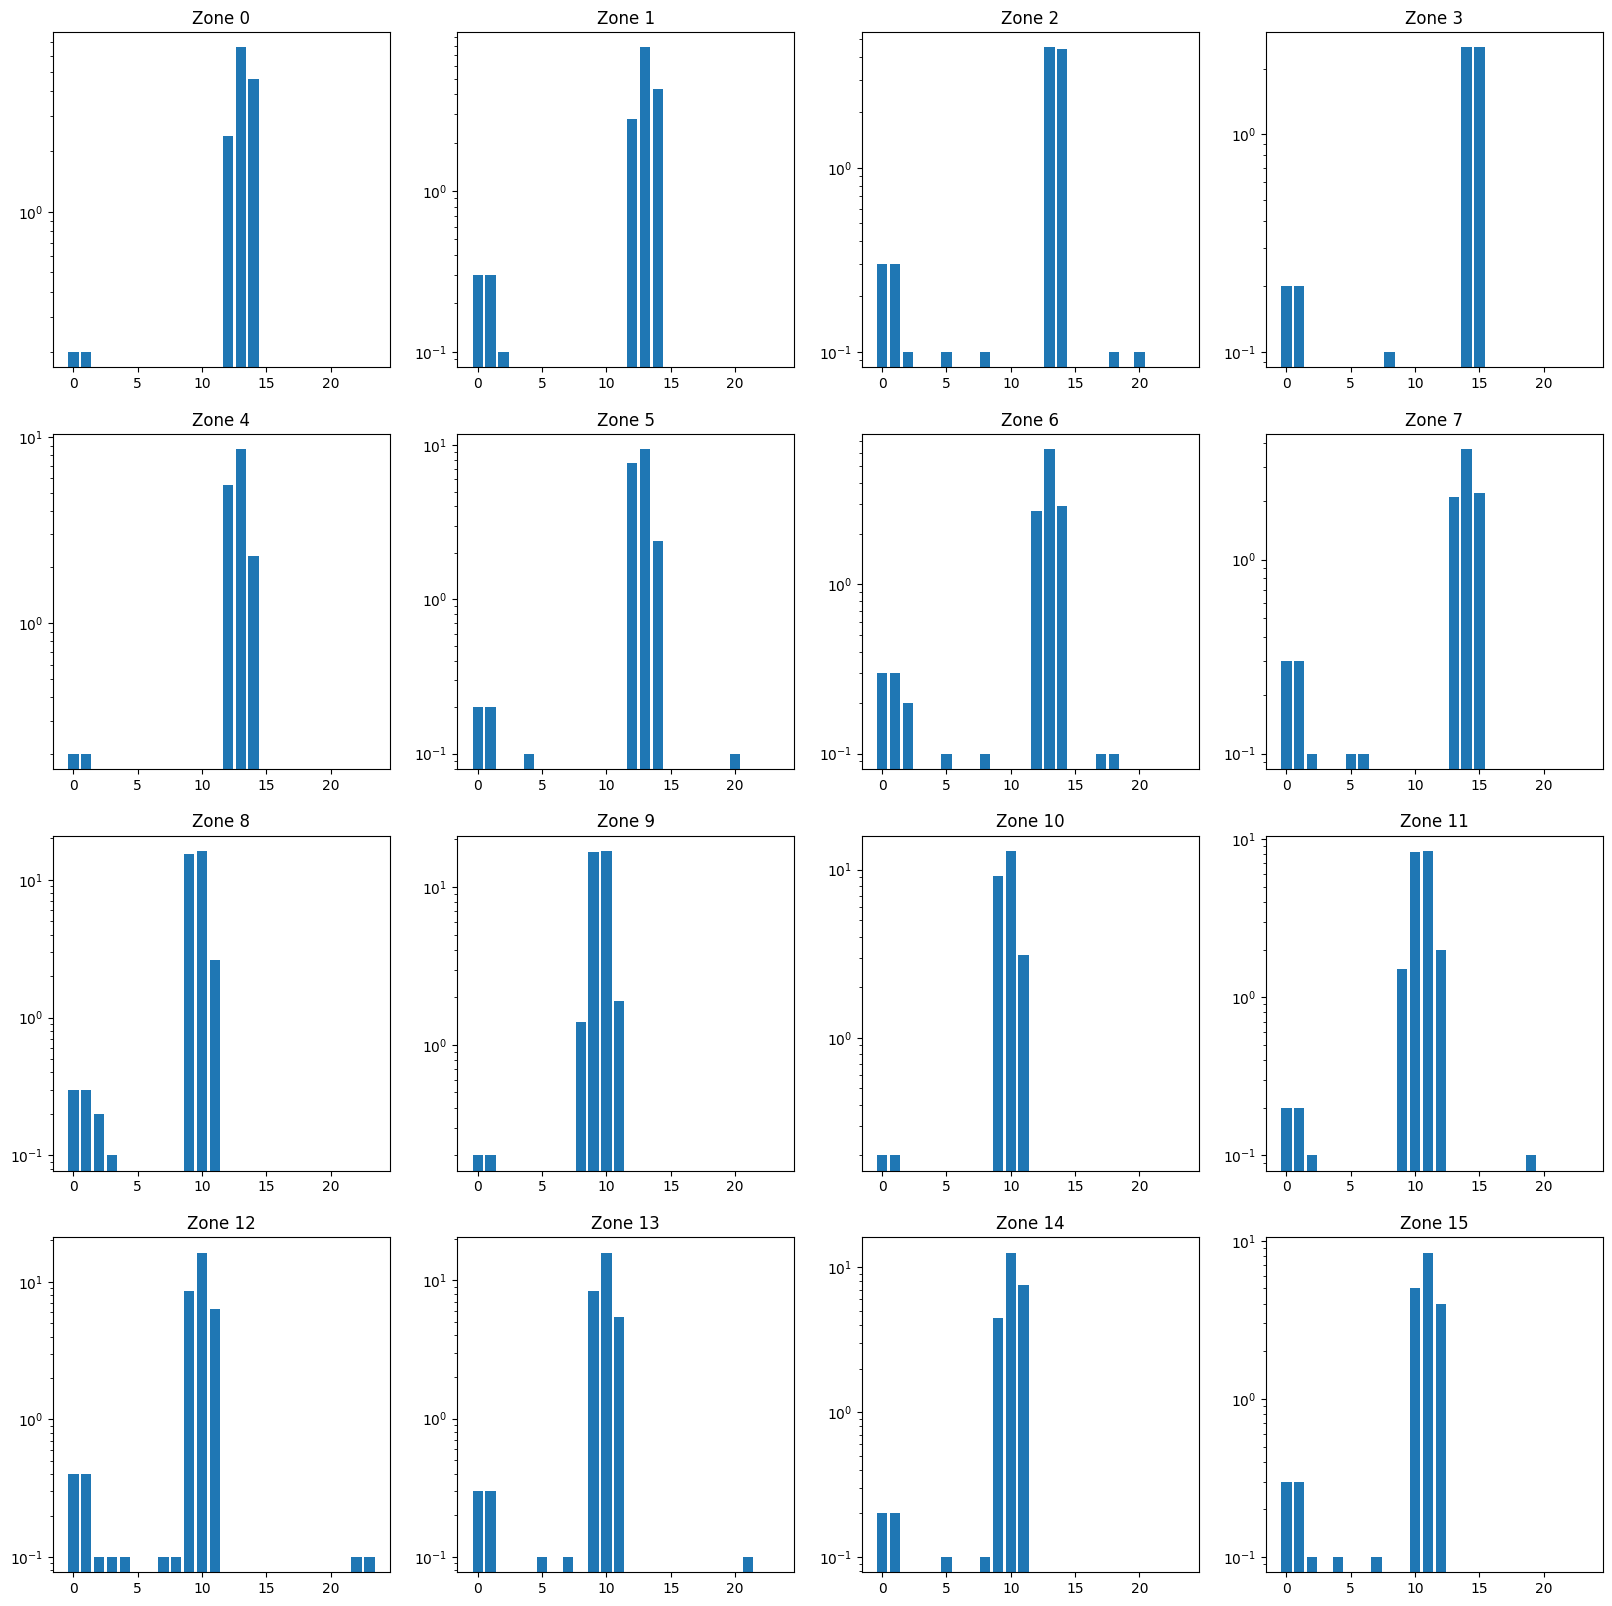

reading line
reading line
2
reading line
3
reading line
4
reading line
5
reading line
6
reading line
7
reading line
8
reading line
9
reading line
10
reading line
11
reading line
12
reading line
13
reading line
14
reading line
15
reading line
16
reading line
17
reading line
18
reading line
19
reading line
20
reading line
21
reading line
22
reading line
23
reading line
24
reading line
25
reading line
26
reading line
27
reading line
28
reading line
29
reading line
30
reading line
31
reading line
32
reading line
33
got spad message
distances: [1837, 1889, 1948, 2026, 1842, 1895, 1959, 2033, 1387, 1425, 1474, 1529, 1388, 1429, 1474, 1528]
histograms: [[0.2, 0.2, 0.1, 0.0, -0.0, 0.0, -0.0, 0.1, -0.1, -0.3, -0.6, -0.3, 2.4, 6.7, 4.6, -0.7, -0.1, -0.1, -0.0, -0.0, -0.0, -0.0, -0.1, -0.0], [0.3, 0.3, 0.1, -0.0, -0.0, -0.0, -0.0, 0.1, -0.0, -0.4, -0.5, -0.4, 3.0, 7.6, 4.4, -0.4, -0.0, -0.1, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0], [0.2, 0.2, 0.1, -0.1, -0.1, -0.1, -0.1, -0.0, 0.0, -0.4, -0.6, -0.3, -0.

KeyboardInterrupt: 

In [30]:
message_builder = SpadMessageBuilder()

count_lines = 0
max_lines = 1000

latest_spad_message = None
# while True:
while count_lines < max_lines:
    print("reading line")
    line_bytearr = rl.readline()
    line_str = line_bytearr.decode("utf-8")
    # print(line_bytearr)
    # print(type(line_bytearr))
    # print(repr(line_str))
    spad_message = message_builder.add_line(line_str)
    if spad_message:
        latest_spad_message = spad_message
        print("got spad message")
        print(f"distances: {spad_message.distances}")
        print(f"histograms: {spad_message.histograms}")

        fig, axs = plt.subplots(4, 4, figsize=(20, 20))

        x = [i for i in range(24)]

        # We can set the number of bins with the *bins* keyword argument.
        for i in range(4):
            for j in range(4):
                axs[i, j].bar(x, latest_spad_message.histograms[i * 4 + j], log=True)
                axs[i, j].set_title(f"Zone {i * 4 + j}")

        plt.show()
    count_lines += 1

print("done reading lines")
message_builder.clear()

In [9]:
ser.close()